<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">


# Colab Yahoo Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [505]:
2 + 2

4

**My own example 1**

In [506]:
56+2

58

Sometimes there is no result to be printed, as is the case with assignment.

In [507]:
X = 2

**My own example 2**

In [508]:
Y = 4

Remember that only the result from the last line is printed.

In [509]:
2 + 2
3 + 3

6

**My own example 3**

In [510]:
3 + 1
5 + 15

20

However, you can print whichever lines you want using the `print` statement.

In [511]:
print(2 + 2)
3 + 3

4


6

**My own example 4**

In [512]:
print(5 + 5)
6 + 6

10


12

##Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

In [513]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

**My own example 5**

In [514]:
#Take some time to run something
a = 0
b = 0
while a < (10000000):
    a = a + 1
    b = b + a
b

50000005000000

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [515]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

**My own example 6**

In [516]:
import requests
import seaborn as sns

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [517]:
#np.random.

##Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [518]:
#np.random.normal?

##Sampling

We'll sample some random data using a function from `numpy`.

In [519]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

**My own example 7**

In [520]:
# Sample 100 points with a mean of 0 and an std of 1. This is a pareto distribution.
Y = np.random.pareto(5, 100)

##Plotting

We can use the plotting library we imported as follows.

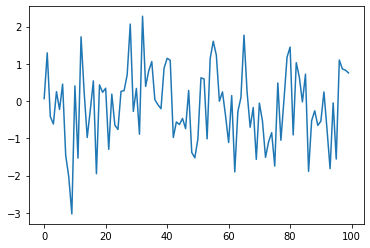

In [521]:
plt.plot(X)

**My own example 8**

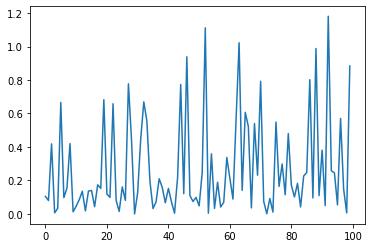

In [522]:
plt.plot(Y)

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

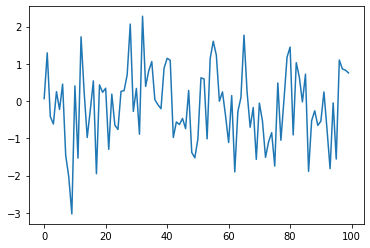

In [523]:
plt.plot(X);

**My own example 9**

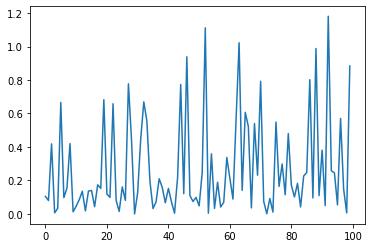

In [524]:
plt.plot(Y);

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

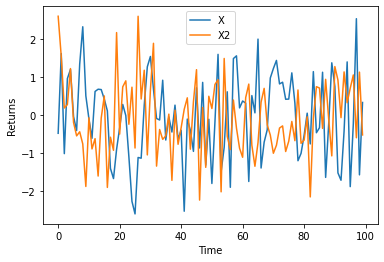

In [525]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

**My own example 10**

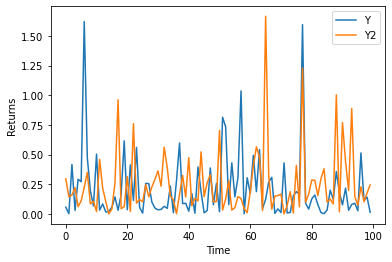

In [526]:
Y = np.random.pareto(5, 100)
Y2 = np.random.pareto(5, 100)

plt.plot(Y);
plt.plot(Y2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['Y', 'Y2']);

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [527]:
np.mean(X)

-0.05458022327936371

In [528]:
np.std(X)

1.105562967564796

**My own example 11**

In [529]:
np.mean(Y)

0.21295866757323176

In [530]:
np.std(Y)

0.28137617107303237

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [531]:
!pip install yfinance

In [532]:
import yfinance as yf

data = yf.download("MSFT", start="2012-1-1", end="2015-6-1") 

[*********************100%***********************]  1 of 1 completed


Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [533]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.623131,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.132008,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.358173,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.705503,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.406641,59706800
...,...,...,...,...,...,...
2015-05-22,47.299999,47.349998,46.820000,46.900002,41.795216,25720600
2015-05-26,46.830002,46.880001,46.189999,46.590000,41.518963,29581900
2015-05-27,46.820000,47.770000,46.619999,47.610001,42.427940,27335600


**My own example 12**

In [534]:
my_data = yf.download("AMD", start="2018-1-1", end="2021-6-1")
my_data 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000
...,...,...,...,...,...,...
2021-05-24,77.260002,78.010002,76.800003,77.440002,77.440002,33194300
2021-05-25,77.330002,78.769997,76.839996,77.860001,77.860001,47353100
2021-05-26,77.830002,78.589996,77.589996,78.339996,78.339996,30354000


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [535]:
X = data['Close']

**My own example 13**

In [536]:
Y = my_data['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

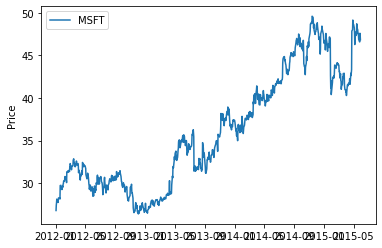

In [537]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

**My own example 14**

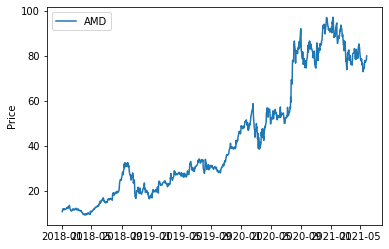

In [538]:
plt.plot(Y.index, Y.values)
plt.ylabel('Price')
plt.legend(['AMD']);

We can get statistics again on real data.

In [539]:
np.mean(X)

36.05204441837061

In [540]:
np.std(X)

6.691260772637948

**My own example 15**

In [541]:
np.mean(Y)

43.098205132917926

In [542]:
np.std(Y)

26.4914867677049

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [543]:
R = X.pct_change()[1:]

We can plot the returns distribution as a histogram.

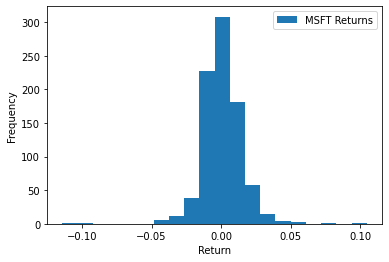

In [544]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

**My own example 16**

In [545]:
R_Y = Y.pct_change()[1:]

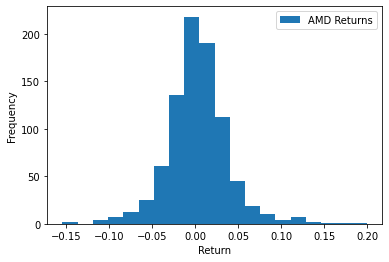

In [546]:
plt.hist(R_Y, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AMD Returns']);

Get statistics again.

In [547]:
np.mean(R)

0.0007593053938455802

In [548]:
np.std(R)

0.014427919863141542

**My own example 17**

In [549]:
np.mean(R_Y)

0.0029687476317441838

In [550]:
np.std(R_Y)

0.036154293550141735

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

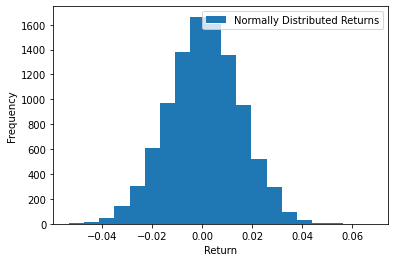

In [551]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

**My own example 18**

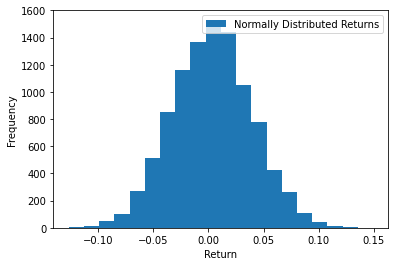

In [552]:
plt.hist(np.random.normal(np.mean(R_Y), np.std(R_Y), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

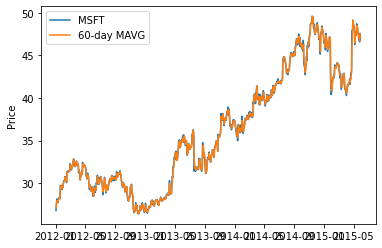

In [553]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(2).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

**My own example 19**

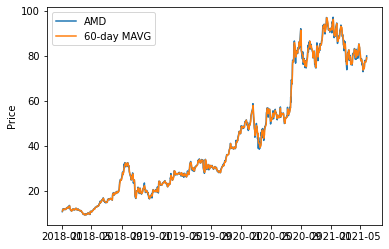

In [554]:
# Take the average of the last 60 days at each timepoint.
MAVG = Y.rolling(2).mean()
plt.plot(Y.index, Y.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['AMD', '60-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">

# Introduction to Python
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

All of the coding that you will do on the Quantopian platform will be in Python. It is also just a good, jack-of-all-trades language to know! Here we will provide you with the basics so that you can feel confident going through our other lectures and understanding what is happening.

## Code Comments

A comment is a note made by a programmer in the source code of a program. Its purpose is to clarify the source code and make it easier for people to follow along with what is happening. Anything in a comment is generally ignored when the code is actually run, making comments useful for including explanations and reasoning as well as removing specific lines of code that you may be unsure about. Comments in Python are created by using the pound symbol (`# Insert Text Here`). Including a `#` in a line of code will comment out anything that follows it.

In [555]:
# This is a comment
# These lines of code will not change any values
# Anything following the first # is not run as code

**My own example 20**

In [556]:
# This is a comment
# This is another comment
# These lines willnot run as code

You may hear text enclosed in triple quotes (`""" Insert Text Here """`) referred to as multi-line comments, but this is not entirely accurate. This is a special type of `string` (a data type we will cover), called a `docstring`, used to explain the purpose of a function.

In [557]:
""" This is a special string """

' This is a special string '

**My own example 21**

In [558]:
""" This is another special string """

' This is another special string '

Make sure you read the comments within each code cell (if they are there). They will provide more real-time explanations of what is going on as you look at each line of code.

## Variables

Variables provide names for values in programming. If you want to save a value for later or repeated use, you give the value a name, storing the contents in a variable. Variables in programming work in a fundamentally similar way to variables in algebra, but in Python they can take on various different data types.

The basic variable types that we will cover in this section are `integers`, `floating point numbers`, `booleans`, and `strings`. 

An `integer` in programming is the same as in mathematics, a round number with no values after the decimal point. We use the built-in `print` function here to display the values of our variables as well as their types!

In [559]:
my_integer = 50
print(my_integer, type(my_integer))

50 <class 'int'>


**My own example 22**

In [560]:
my_float = 50.0
print(my_float, type(my_float))

50.0 <class 'float'>


Variables, regardless of type, are assigned by using a single equals sign (`=`). Variables are case-sensitive so any changes in variation in the capitals of a variable name will reference a different variable entirely.

In [561]:
one = 1
try:
    print(One)
except Exception as e:
    print(e)

name 'One' is not defined


**My own example 23**

In [562]:
two = 2
try:
    print(Two)
except Exception as e:
    print(e)

name 'Two' is not defined


A `floating point` number, or a `float` is a fancy name for a real number (again as in mathematics). To define a `float`, we need to either include a decimal point or specify that the value is a float.

In [563]:
my_float = 1.0
print(my_float, type(my_float))
my_float = float(1)
print(my_float, type(my_float))

1.0 <class 'float'>
1.0 <class 'float'>


**My own example 24**

In [564]:
my_float = 11.0
print(my_float, type(my_float))
my_float = float(11)
print(my_float, type(my_float))

11.0 <class 'float'>
11.0 <class 'float'>


A variable of type `float` will not round the number that you store in it, while a variable of type `integer` will. This makes `floats` more suitable for mathematical calculations where you want more than just integers.

Note that as we used the `float()` function to force an number to be considered a `float`, we can use the `int()` function to force a number to be considered an `int`.

In [565]:
my_int = int(3.14159)
print(my_int, type(my_int))

3 <class 'int'>


**My own example 25**

In [566]:
my_int = int(2.7182)
print(my_int, type(my_int))

2 <class 'int'>


The `int()` function will also truncate any digits that a number may have after the decimal point!

Strings allow you to include text as a variable to operate on. They are defined using either single quotes ('') or double quotes ("").

In [567]:
my_string = 'This is a string with single quotes'
print(my_string)
my_string = "This is a string with double quotes"
print(my_string)

This is a string with single quotes
This is a string with double quotes


**My own example 26**

In [568]:
my_string = 'This is a string with \'single\' quotes'
print(my_string)
my_string = "This is a string with \"double\" quotes"
print(my_string)

This is a string with 'single' quotes
This is a string with "double" quotes


Both are allowed so that we can include apostrophes or quotation marks in a string if we so choose.

In [569]:
my_string = '"Jabberwocky", by Lewis Carroll'
print(my_string)
my_string = "'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;"
print(my_string)

"Jabberwocky", by Lewis Carroll
'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;


**My own example 27**

In [570]:
my_string = '"For Whom the Bell Tolls", by Ernest Hemingway'
print(my_string)
my_string = "'No man is an Island, intire of it selfe; every man is a piece of the Continent, a part of the maine; "
print(my_string)

"For Whom the Bell Tolls", by Ernest Hemingway
'No man is an Island, intire of it selfe; every man is a piece of the Continent, a part of the maine; 


Booleans, or `bools` are binary variable types. A `bool` can only take on one of two values, these being `True` or `False`. There is much more to this idea of truth values when it comes to programming, which we cover later in the [Logical Operators](#id-section5) of this notebook.

In [571]:
my_bool = True
print(my_bool, type(my_bool))

True <class 'bool'>


**My own example 28**

In [572]:
my_bool = False
print(my_bool, type(my_bool))

False <class 'bool'>


There are many more data types that you can assign as variables in Python, but these are the basic ones! We will cover a few more later as we move through this tutorial.

## Basic Math

Python has a number of built-in math functions. These can be extended even further by importing the **math** package or by including any number of other calculation-based packages.

All of the basic arithmetic operations are supported: `+`, `-`, `/`, and `*`. You can create exponents by using `**` and modular arithmetic is introduced with the mod operator, `%`.

In [573]:
print('Addition: ', 2 + 2)
print('Subtraction: ', 7 - 4)
print('Multiplication: ', 2 * 5)
print('Division: ', 10 / 2)
print('Exponentiation: ', 3**2)

Addition:  4
Subtraction:  3
Multiplication:  10
Division:  5.0
Exponentiation:  9


**My own example 29**

In [574]:
print('Addition: ', 3 + 3)
print('Subtraction: ', 9 - 6)
print('Multiplication: ', 50 * 5)
print('Division: ', 100 / 2)
print('Exponentiation: ', 3**4)

Addition:  6
Subtraction:  3
Multiplication:  250
Division:  50.0
Exponentiation:  81


If you are not familiar with the the mod operator, it operates like a remainder function. If we type $15 \ \% \ 4$, it will return the remainder after dividing $15$ by $4$.

In [575]:
print('Modulo: ', 15 % 4)

Modulo:  3


**My own example 30**

In [576]:
print('Modulo: ', 17 % 6)

Modulo:  5


Mathematical functions also work on variables!

In [577]:
first_integer = 4
second_integer = 5
print(first_integer * second_integer)

20


**My own example 31**

In [578]:
first_integer = 20
second_integer = 65
print(first_integer * second_integer)

1300


Make sure that your variables are floats if you want to have decimal points in your answer. If you perform math exclusively with integers, you get an integer. Including any float in the calculation will make the result a float.

In [579]:
first_integer = 11
second_integer = 3
print(first_integer / second_integer)

3.6666666666666665


In [580]:
first_number = 11.0
second_number = 3.0
print(first_number / second_number)

3.6666666666666665


**My own example 32**

In [581]:
first_integer = 39
second_integer = 7
print(first_integer / second_integer)

5.571428571428571


In [582]:
first_number = 39.0
second_number = 7.0
print(first_number / second_number)

5.571428571428571


Python has a few built-in math functions. The most notable of these are:

* `abs()`
* `round()`
* `max()`
* `min()`
* `sum()`

These functions all act as you would expect, given their names. Calling `abs()` on a number will return its absolute value. The `round()` function will round a number to a specified number of the decimal points (the default is $0$). Calling `max()` or `min()` on a collection of numbers will return, respectively, the maximum or minimum value in the collection. Calling `sum()` on a collection of numbers will add them all up. If you're not familiar with how collections of values in Python work, don't worry! We will cover collections in-depth in the next section. 

Additional math functionality can be added in with the `math` package.

In [583]:
import math

The math library adds a long list of new mathematical functions to Python. Feel free to check out the [documentation](https://docs.python.org/2/library/math.html) for the full list and details. It concludes some mathematical constants

In [584]:
print('Pi: ', math.pi)
print("Euler's Constant: ", math.e)

Pi:  3.141592653589793
Euler's Constant:  2.718281828459045


**My own example 33**

In [585]:
print('Inf: ', math.inf)
print("Nan: ", math.nan)

Inf:  inf
Nan:  nan


As well as some commonly used math functions

In [586]:
print('Cosine of pi: ', math.cos(math.pi))

Cosine of pi:  -1.0


**My own example 34**

In [587]:
print('Sine of e: ', math.sin(math.e))

Sine of e:  0.41078129050290885


## Collections
### Lists

A `list` in Python is an ordered collection of objects that can contain any data type. We define a `list` using brackets (`[]`).

In [588]:
my_list = [1, 2, 3]
print(my_list)

[1, 2, 3]


**My own example 35** 

In [589]:
my_own_list = ["a","b","c"]
print(my_own_list)

['a', 'b', 'c']


We can access and index the list by using brackets as well. In order to select an individual element, simply type the list name followed by the index of the item you are looking for in braces.

In [590]:
print(my_list[0])
print(my_list[2])

1
3


**My own example 35** 

In [591]:
print(my_own_list[1])
print(my_own_list[-1])

b
c


Indexing in Python starts from $0$. If you have a list of length $n$, the first element of the list is at index $0$, the second element is at index $1$, and so on and so forth. The final element of the list will be at index $n-1$. Be careful! Trying to access a non-existent index will cause an error.

In [592]:
print('The first, second, and third list elements: ', my_list[0], my_list[1], my_list[2])
try:
    print('Accessing outside the list bounds causes an error: ', my_list[3])
except Exception as e:
    print(e)

The first, second, and third list elements:  1 2 3
list index out of range


**My own example 36**

In [593]:
print('The first, second, and third list elements: ', " ".join(element for element in my_own_list))
try:
    print('Accessing outside the list bounds causes an error: ', my_own_list[len(my_own_list)])
except Exception as e:
    print(e)

The first, second, and third list elements:  a b c
list index out of range


We can see the number of elements in a list by calling the `len()` function.

In [594]:
print(len(my_list))

3


**My own example 37**

In [595]:
print(len(my_own_list))

3


We can update and change a list by accessing an index and assigning new value.

In [596]:
print(my_list)
my_list[0] = 42
print(my_list)

[1, 2, 3]
[42, 2, 3]


**My own example 38**

In [597]:
print(my_own_list)
my_own_list[0] = 42
print(my_own_list)

['a', 'b', 'c']
[42, 'b', 'c']


This is fundamentally different from how strings are handled. A `list` is mutable, meaning that you can change a `list`'s elements without changing the list itself. Some data types, like `strings`, are immutable, meaning you cannot change them at all. Once a `string` or other immutable data type has been created, it cannot be directly modified without creating an entirely new object.

In [598]:
my_string = "Strings never change"
try:
    my_string[0] = 'Z'
except Exception as e:
    print(e)

'str' object does not support item assignment


**My own example 39**

In [599]:
my_string = "Strings are inmutable"
try:
    my_string[-1] = 'Z'
except Exception as e:
    print(e)

'str' object does not support item assignment


As we stated before, a list can contain any data type. Thus, lists can also contain strings.

In [600]:
my_list_2 = ['one', 'two', 'three']
print(my_list_2)

['one', 'two', 'three']


**My own example 40**

In [601]:
print(my_own_list)

[42, 'b', 'c']


Lists can also contain multiple different data types at once!

In [602]:
my_list_3 = [True, 'False', 42]

**My own example 41**

In [603]:
my_own_list_2 =[True, "a", my_own_list]
print(my_own_list_2)

[True, 'a', [42, 'b', 'c']]


If you want to put two lists together, they can be combined with a `+` symbol.

In [604]:
my_list_4 = my_list + my_list_2 + my_list_3
print(my_list_4)

[42, 2, 3, 'one', 'two', 'three', True, 'False', 42]


**My own example 41**

In [605]:
my_own_list_3 = my_own_list + my_own_list_2
print(my_own_list_3)

[42, 'b', 'c', True, 'a', [42, 'b', 'c']]


In addition to accessing individual elements of a list, we can access groups of elements through slicing.

In [606]:
my_list = ['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

**My own example 42**

In [607]:
my_own_list = ['first', 'second', 'third', 'last']

#### Slicing

We use the colon (`:`) to slice lists. 

In [608]:
print(my_list[2:4])

['countrymen', 'lend']


**My own example 43**

In [609]:
print(my_own_list[2:4])

['third', 'last']


Using `:` we can select a group of elements in the list starting from the first element indicated and going up to  (but not including) the last element indicated.

We can also select everything after a certain point

In [610]:
print(my_list[1:])

['romans', 'countrymen', 'lend', 'me', 'your', 'ears']


**My own example 44**

In [611]:
print(my_own_list[2:])

['third', 'last']


And everything before a certain point

In [612]:
print(my_list[:4])

['friends', 'romans', 'countrymen', 'lend']


**My own example 45**

In [613]:
print(my_own_list[:-2])

['first', 'second']


Using negative numbers will count from the end of the indices instead of from the beginning. For example, an index of `-1` indicates the last element of the list.

In [614]:
print(my_list[-1])

ears


**My own example 46**

In [615]:
print(my_own_list[-2])

third


You can also add a third component to slicing. Instead of simply indicating the first and final parts of your slice, you can specify the step size that you want to take. So instead of taking every single element, you can take every other element.

In [616]:
print(my_list[0:7:2])

['friends', 'countrymen', 'me', 'ears']


**My own example 47**

In [617]:
print(my_own_list[1:4:2])

['second', 'last']


Here we have selected the entire list (because `0:7` will yield elements `0` through `6`) and we have selected a step size of `2`. So this will spit out element `0` , element `2`, element `4`, and so on through the list element selected. We can skip indicated the beginning and end of our slice, only indicating the step, if we like.

In [618]:
print(my_list[::2])

['friends', 'countrymen', 'me', 'ears']


**My own example 48**

In [619]:
print(my_own_list[1::2])

['second', 'last']


Lists implictly select the beginning and end of the list when not otherwise specified.

In [620]:
print(my_list[:])

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']


**My own example 49**

In [621]:
print(my_own_list[:])

['first', 'second', 'third', 'last']


With a negative step size we can even reverse the list!

In [622]:
print(my_list[::-1])

['ears', 'your', 'me', 'lend', 'countrymen', 'romans', 'friends']


**My own example 50**

In [623]:
print(my_own_list[::-2])

['last', 'second']


Python does not have native matrices, but with lists we can produce a working fascimile. Other packages, such as `numpy`, add matrices as a separate data type, but in base Python the best way to create a matrix is to use a list of lists.

We can also use built-in functions to generate lists. In particular we will look at `range()` (because we will be using it later!). Range can take several different inputs and will return a list.

In [624]:
b = 10
my_list = range(b)
print(my_list)

range(0, 10)


**My own example 51**

In [625]:
a = 8
my_own_list = range(a)
print(my_own_list)

range(0, 8)


Similar to our list-slicing methods from before, we can define both a start and an end for our range. This will return a list that is includes the start and excludes the end, just like a slice.

In [626]:
a = 0
b = 10
my_list = range(a, b)
print(my_list)

range(0, 10)


**My own example 52**

In [627]:
a = 1
b = 101
my_own_list = range(a, b)
print(my_own_list)

range(1, 101)


We can also specify a step size. This again has the same behavior as a slice.

In [628]:
a = 0
b = 10
step = 2
my_list = range(a, b, step)
print(my_list)

range(0, 10, 2)


**My own example 53**

In [629]:
a = 0
b = 100
step = 3
my_own_list = range(a, b, step)
print(my_own_list)

range(0, 100, 3)


### Tuples

A `tuple` is a data type similar to a list in that it can hold different kinds of data types. The key difference here is that a `tuple` is immutable. We define a `tuple` by separating the elements we want to include by commas. It is conventional to surround a `tuple` with parentheses.

In [630]:
my_tuple = 'I', 'have', 30, 'cats'
print(my_tuple)

('I', 'have', 30, 'cats')


In [631]:
my_tuple = ('I', 'have', 30, 'cats')
print(my_tuple)

('I', 'have', 30, 'cats')


**My own example 54**

In [632]:
my_own_tuple = 'a', 'b', 3, 'c'
print(my_own_tuple)

('a', 'b', 3, 'c')


In [633]:
my_tuple = ('a', 'b', 3, 'c')
print(my_tuple)

('a', 'b', 3, 'c')


As mentioned before, tuples are immutable. You can't change any part of them without defining a new tuple.

In [634]:
try:
    my_tuple[3] = 'dogs' # Attempts to change the 'cats' value stored in the the tuple to 'dogs'
except Exception as e:
    print(e)

'tuple' object does not support item assignment


**My own example 55**

In [635]:
try:
    my_own_tuple[3] = 'first' # Attempts to change the 'last' value stored in the the tuple to 'first'
except Exception as e:
    print(e)

'tuple' object does not support item assignment


You can slice tuples the same way that you slice lists!

In [636]:
print(my_tuple[1:3])

('b', 3)


**My own example 56**

In [637]:
print(my_own_tuple[1:3])

('b', 3)


And concatenate them the way that you would with strings!

In [638]:
my_other_tuple = ('make', 'that', 50)
print(my_tuple + my_other_tuple)

('a', 'b', 3, 'c', 'make', 'that', 50)


**My own example 57**

In [639]:
my_other_tuple = ('make', 'that', 100)
print(my_own_tuple + my_other_tuple)

('a', 'b', 3, 'c', 'make', 'that', 100)


We can 'pack' values together, creating a tuple (as above), or we can 'unpack' values from a tuple, taking them out.

In [640]:
str_1, str_2, int_1 = my_other_tuple
print(str_1, str_2, int_1)

make that 100


**My own example 58**

In [641]:
print(my_own_tuple)
str_1, str_2, int_1, str_3 = my_own_tuple
print(str_1, str_2, int_1, str_3)

('a', 'b', 3, 'c')
a b 3 c


Unpacking assigns each value of the tuple in order to each variable on the left hand side of the equals sign. Some functions, including user-defined functions, may return tuples, so we can use this to directly unpack them and access the values that we want.

### Sets

A `set` is a collection of unordered, unique elements. It works almost exactly as you would expect a normal set of things in mathematics to work and is defined using braces (`{}`).

In [642]:
things_i_like = {'dogs', 7, 'the number 4', 4, 4, 4, 42, 'lizards', 'man I just LOVE the number 4'}
print(things_i_like, type(things_i_like))

{'lizards', 4, 7, 'the number 4', 42, 'dogs', 'man I just LOVE the number 4'} <class 'set'>


**My own example 59**

In [643]:
things = {'uno', 1, 'the number 4', "house"}
print(things, type(things))


{'the number 4', 'uno', 'house', 1} <class 'set'>


Note how any extra instances of the same item are removed in the final set. We can also create a `set` from a list, using the `set()` function.

In [644]:
animal_list = ['cats', 'dogs', 'dogs', 'dogs', 'lizards', 'sponges', 'cows', 'bats', 'sponges']
animal_set = set(animal_list)
print(animal_set) # Removes all extra instances from the list)

{'cats', 'lizards', 'cows', 'dogs', 'sponges', 'bats'}


**My own example 60**

In [645]:
sport_list = ['Soccer', 'Soccer', 'Basketball', 'Tennis', 'Baseball', 'Golf', 'Tennis', 'Baseball', 'Golf']
sport_set = set(sport_list)
print(sport_set) # Removes all extra instances from the list)

{'Soccer', 'Basketball', 'Tennis', 'Baseball', 'Golf'}


Calling `len()` on a set will tell you how many elements are in it.

In [646]:
print(len(animal_set))

6


**My own example 61**



In [647]:
print(len(sport_set))

5


Because a `set` is unordered, we can't access individual elements using an index. We can, however, easily check for membership (to see if something is contained in a set) and take the unions and intersections of sets by using the built-in set functions.

In [648]:
'cats' in animal_set # Here we check for membership using the `in` keyword.

True

**My own example 62**

In [649]:
'cats' in sport_set # Here we check for membership using the `in` keyword.

False

Here we checked to see whether the string 'cats' was contained within our `animal_set` and it returned `True`, telling us that it is indeed in our set.

We can connect sets by using typical mathematical set operators, namely `|`, for union, and `&`, for intersection. Using `|` or `&` will return exactly what you would expect if you are familiar with sets in mathematics.

In [650]:
print(animal_set | things_i_like) # You can also write things_i_like | animal_set with no difference

{'cats', 'lizards', 4, 7, 'the number 4', 'cows', 42, 'dogs', 'sponges', 'man I just LOVE the number 4', 'bats'}


**My own example 67**

In [651]:
print(animal_set | sport_set) # You can also write 

{'cats', 'lizards', 'Soccer', 'cows', 'Basketball', 'dogs', 'Tennis', 'sponges', 'Baseball', 'Golf', 'bats'}


Pairing two sets together with `|` combines the sets, removing any repetitions to make every set element unique.

In [652]:
print(animal_set & things_i_like) # You can also write things_i_like & animal_set with no difference

{'lizards', 'dogs'}


**My own example 68**

In [653]:
print(animal_set & sport_set) # You can also write things_i_like & animal_set with no difference

set()


Pairing two sets together with `&` will calculate the intersection of both sets, returning a set that only contains what they have in common.

If you are interested in learning more about the built-in functions for sets, feel free to check out the [documentation](https://docs.python.org/2/library/sets.html).

### Dictionaries

Another essential data structure in Python is the dictionary. Dictionaries are defined with a combination of curly braces (`{}`) and colons (`:`). The braces define the beginning and end of a dictionary and the colons indicate key-value pairs. A dictionary is essentially a set of key-value pairs. The key of any entry must be an immutable data type. This makes both strings and tuples candidates. Keys can be both added and deleted.

In the following example, we have a dictionary composed of key-value pairs where the key is a genre of fiction (`string`) and the value is a list of books (`list`) within that genre. Since a collection is still considered a single entity, we can use one to collect multiple variables or values into one key-value pair.

In [654]:
my_dict = {"High Fantasy": ["Wheel of Time", "Lord of the Rings"], 
           "Sci-fi": ["Book of the New Sun", "Neuromancer", "Snow Crash"],
           "Weird Fiction": ["At the Mountains of Madness", "The House on the Borderland"]}

**My own example 69**

In [655]:
my_own_dict = {"Ferrari": ["Schumacher", "Kimi"], 
           "Mercedes": ["Hamilton", "Rossberg", "Bottas"],
           "Red Bull": ["Vettel", "Verstappen"]}

After defining a dictionary, we can access any individual value by indicating its key in brackets.

In [656]:
print(my_dict["Sci-fi"])

['Book of the New Sun', 'Neuromancer', 'Snow Crash']


**My own example 70**

In [657]:
print(my_own_dict["Red Bull"])

['Vettel', 'Verstappen']


We can also change the value associated with a given key

In [658]:
my_dict["Sci-fi"] = "I can't read"
print(my_dict["Sci-fi"])

I can't read


**My own example 71**

In [659]:
my_own_dict["Ferrari"] = "Scuderia"
print(my_own_dict["Ferrari"])

Scuderia


Adding a new key-value pair is as simple as defining it.

In [660]:
my_dict["Historical Fiction"] = ["Pillars of the Earth"]
print(my_dict["Historical Fiction"])

['Pillars of the Earth']


In [661]:
print(my_dict)

{'High Fantasy': ['Wheel of Time', 'Lord of the Rings'], 'Sci-fi': "I can't read", 'Weird Fiction': ['At the Mountains of Madness', 'The House on the Borderland'], 'Historical Fiction': ['Pillars of the Earth']}


**My own example 72**

In [662]:
my_own_dict["Williams"] = ["Montoya"]
print(my_own_dict["Williams"])

['Montoya']


In [663]:
print(my_own_dict)

{'Ferrari': 'Scuderia', 'Mercedes': ['Hamilton', 'Rossberg', 'Bottas'], 'Red Bull': ['Vettel', 'Verstappen'], 'Williams': ['Montoya']}


## String Shenanigans

We already know that strings are generally used for text. We can used built-in operations to combine, split, and format strings easily, depending on our needs.

The `+` symbol indicates concatenation in string language. It will combine two strings into a longer string.

In [664]:
first_string = '"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /'
second_string = 'Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/'
third_string = first_string + second_string
print(third_string)

"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/


**My own example 73**

In [665]:
first_string = '"First String/'
second_string = 'Second String/'
third_string = first_string + second_string
print(third_string)

"First String/Second String/


Strings are also indexed much in the same way that lists are.

In [666]:
my_string = 'Supercalifragilisticexpialidocious'
print('The first letter is: ', my_string[0]) # Uppercase S
print('The last letter is: ', my_string[-1]) # lowercase s
print('The second to last letter is: ', my_string[-2]) # lowercase u
print('The first five characters are: ', my_string[0:5]) # Remember: slicing doesn't include the final element!
print('Reverse it!: ', my_string[::-1])

The first letter is:  S
The last letter is:  s
The second to last letter is:  u
The first five characters are:  Super
Reverse it!:  suoicodilaipxecitsiligarfilacrepuS


**My own example 74**

In [667]:
my_own_string = 'ThisIsIsAString'
print('The first letter is: ', my_own_string[0]) 
print('The last letter is: ', my_own_string[-1]) 
print('The second to last letter is: ', my_own_string[-2]) 
print('The first five characters are: ', my_own_string[0:5]) # Remember: slicing doesn't include the final element!
print('Reverse it!: ', my_own_string[::-1])

The first letter is:  T
The last letter is:  g
The second to last letter is:  n
The first five characters are:  ThisI
Reverse it!:  gnirtSAsIsIsihT


Built-in objects and classes often have special functions associated with them that are called methods. We access these methods by using a period ('.'). We will cover objects and their associated methods more in another lecture!

Using string methods we can count instances of a character or group of characters.

In [668]:
print('Count of the letter i in Supercalifragilisticexpialidocious: ', my_string.count('i'))
print('Count of "li" in the same word: ', my_string.count('li'))

Count of the letter i in Supercalifragilisticexpialidocious:  7
Count of "li" in the same word:  3


**My own example 75**

In [669]:
print('Count of the letter i in ThisIsIsAString: ', my_own_string.count('i'))
print('Count of "Is" in the same word: ', my_own_string.count('Is'))

Count of the letter i in ThisIsIsAString:  2
Count of "Is" in the same word:  2


We can also find the first instance of a character or group of characters in a string.

In [670]:
print('The first time i appears is at index: ', my_string.find('i'))

The first time i appears is at index:  8


**My own example 76**

In [671]:
print('The first time s appears is at index: ', my_own_string.find('s'))

The first time s appears is at index:  3


As well as replace characters in a string.

In [672]:
print("All i's are now a's: ", my_string.replace('i', 'a'))

All i's are now a's:  Supercalafragalastacexpaaladocaous


In [673]:
print("It's raining cats and dogs".replace('dogs', 'more cats'))

It's raining cats and more cats


**My own example 77**

In [674]:
print("All i's are now a's: ", my_own_string.replace('i', 'a'))

All i's are now a's:  ThasIsIsAStrang


In [675]:
print("It's raining cats and dogs".replace('dogs', 'lions'))

It's raining cats and lions


There are also some methods that are unique to strings. The function `upper()` will convert all characters in a string to uppercase, while `lower()` will convert all characters in a string to lowercase!

In [676]:
my_string = "I can't hear you"
print(my_string.upper())
my_string = "I said HELLO"
print(my_string.lower())

I CAN'T HEAR YOU
i said hello


**My own example 78**

In [677]:
my_own_string = "This is a String"
print(my_own_string.upper())
my_own_string = "I said BYE"
print(my_own_string.lower())

THIS IS A STRING
i said bye


### String Formatting

Using the `format()` method we can add in variable values and generally format our strings.

In [678]:
my_string = "{0} {1}".format('Marco', 'Polo')
print(my_string)

Marco Polo


In [679]:
my_string = "{1} {0}".format('Marco', 'Polo')
print(my_string)

Polo Marco


**My own example 79**

In [680]:
my_own_string = "{0} {1}".format('Formula', 'Uno')
print(my_own_string)

Formula Uno


In [681]:
my_own_string = "{1} {0}".format('Formula', 'Uno')
print(my_own_string)

Uno Formula


We use braces (`{}`) to indicate parts of the string that will be filled in later and we use the arguments of the `format()` function to provide the values to substitute. The numbers within the braces indicate the index of the value in the `format()` arguments.

See the `format()` [documentation](https://docs.python.org/2/library/string.html#format-examples) for additional examples.

If you need some quick and dirty formatting, you can instead use the `%` symbol, called the string formatting operator. 

In [682]:
print('insert %s here' % 'value')

insert value here


**My own example 80**

In [683]:
print('Today is %s, tomorrow saturday' % 'friday')

Today is friday, tomorrow saturday


The `%` symbol basically cues Python to create a placeholder. Whatever character follows the `%` (in the string) indicates what sort of type the value put into the placeholder will have. This character is called a *conversion type*. Once the string has been closed, we need another `%` that will be followed by the values to insert. In the case of one value, you can just put it there. If you are inserting more than one value, they must be enclosed in a tuple.

In [684]:
print('There are %s cats in my %s' % (13, 'apartment'))

There are 13 cats in my apartment


**My own example 81**

In [685]:
print('Today is %s, tomorrow %s' % ('friday', 'saturday'))

Today is friday, tomorrow saturday


In these examples, the `%s` indicates that Python should convert the values into strings. There are multiple conversion types that you can use to get more specific with the the formatting. See the string formatting [documentation](https://docs.python.org/2/library/stdtypes.html#string-formatting) for additional examples and more complete details on use.

## Logical Operators
### Basic Logic

Logical operators deal with `boolean` values, as we briefly covered before. If you recall, a `bool` takes on one of two values, `True` or `False` (or $1$ or $0$). The basic logical statements that we can make are defined using the built-in comparators. These are `==` (equal), `!=` (not equal), `<` (less than), `>` (greater than), `<=` (less than or equal to), and `>=` (greater than or equal to).

In [686]:
print(5 == 5)

True


**My own example 82**

In [687]:
print("a" == "a")

True


**My own example 83**

In [688]:
print("a" > "a")

False


These comparators also work in conjunction with variables.

In [689]:
m = 2
n = 23
print(m < n)

True


**My own example 84**

In [690]:
a = 24156
b = 23
print(a < b)

False


We can string these comparators together to make more complex logical statements using the logical operators `or`, `and`, and `not`. 

In [691]:
statement_1 = 10 > 2
statement_2 = 4 <= 6
print("Statement 1 truth value: {0}".format(statement_1))
print("Statement 2 truth value: {0}".format(statement_2))
print("Statement 1 and Statement 2: {0}".format(statement_1 and statement_2))

Statement 1 truth value: True
Statement 2 truth value: True
Statement 1 and Statement 2: True


**My own example 85**

In [692]:
statement_1 = 1 > 2
statement_2 = 4 >= 6
print("Statement 1 false value: {0}".format(statement_1))
print("Statement 2 false value: {0}".format(statement_2))
print("Statement 1 and Statement 2: {0}".format(statement_1 and statement_2))

Statement 1 false value: False
Statement 2 false value: False
Statement 1 and Statement 2: False


The `or` operator performs a logical `or` calculation. This is an inclusive `or`, so if either component paired together by `or` is `True`, the whole statement will be `True`. The `and` statement only outputs `True` if all components that are `and`ed together are True. Otherwise it will output `False`. The `not` statement simply inverts the truth value of whichever statement follows it. So a `True` statement will be evaluated as `False` when a `not` is placed in front of it. Similarly, a `False` statement will become `True` when a `not` is in front of it.

Say that we have two logical statements, or assertions, $P$ and $Q$. The truth table for the basic logical operators is as follows:

|  P  |  Q  | `not` P| P `and` Q | P `or` Q|
|:-----:|:-----:|:---:|:---:|:---:|
| `True` | `True` | `False` | `True` | `True` |
| `False` | `True` | `True` | `False` | `True` |
| `True` | `False` | `False` | `False` | `True` |
| `False` | `False` | `True` | `False` | `False` |

We can string multiple logical statements together using the logical operators.

In [693]:
print (((2 < 3) and (3 > 0)) or ((5 > 6) and not (4 < 2)))

True


**My own example 86**

In [694]:
print (((56 < 546) and (1 > 100)) or ((2 > 6) and not (89 < 11)))

False


Logical statements can be as simple or complex as we like, depending on what we need to express. Evaluating the above logical statement step by step we see that we are evaluating (`True and True`) `or` (`False and not False`). This becomes `True or (False and True`), subsequently becoming `True or False`, ultimately being evaluated as `True`.

#### Truthiness

Data types in Python have a fun characteristic called truthiness. What this means is that most built-in types will evaluate as either `True` or `False` when a boolean value is needed (such as with an if-statement). As a general rule, containers like strings, tuples, dictionaries, lists, and sets, will return `True` if they contain anything at all and `False` if they contain nothing.

In [695]:
# Similar to how float() and int() work, bool() forces a value to be considered a boolean!
print(bool(''))

False


In [696]:
print(bool('I have character!'))

True


In [697]:
print(bool([]))

False


In [698]:
print(bool([1, 2, 3]))

True


**My own example 87**

In [699]:
print(bool(12.5))

True


In [700]:
print(bool(set({1,2,3,1})))

True


In [701]:
print(bool(("a",12)))

True


In [702]:
print(bool({"a" : "b"}))

True


And so on, for the other collections and containers. `None` also evaluates as `False`. The number `1` is equivalent to `True` and the number `0` is equivalent to `False` as well, in a boolean context.

### If-statements

We can create segments of code that only execute if a set of conditions is met. We use if-statements in conjunction with logical statements in order to create branches in our code. 

An `if` block gets entered when the condition is considered to be `True`. If condition is evaluated as `False`, the `if` block will simply be skipped unless there is an `else` block to accompany it. Conditions are made using either logical operators or by using the truthiness of values in Python. An if-statement is defined with a colon and a block of indented text.

In [703]:
# This is the basic format of an if statement. This is a vacuous example. 
# The string "Condition" will always evaluated as True because it is a
# non-empty string. he purpose of this code is to show the formatting of
# an if-statement.
if "Condition": 
    # This block of code will execute because the string is non-empty
    # Everything on these indented lines
    print(True)
else:
    # So if the condition that we examined with if is in fact False
    # This block of code will execute INSTEAD of the first block of code
    # Everything on these indented lines
    print(False)
# The else block here will never execute because "Condition" is a non-empty string.

True


In [704]:
i = 4
if i == 5:
    print('The variable i has a value of 5')

Because in this example `i = 4` and the if-statement is only looking for whether `i` is equal to `5`, the print statement will never be executed. We can add in an `else` statement to create a contingency block of code in case the condition in the if-statement is not evaluated as `True`.

In [705]:
i = 4
if i == 5:
    print ("All lines in this indented block are part of this block")
    print ('The variable i has a value of 5')
else:
    print ("All lines in this indented block are part of this block")
    print ('The variable i is not equal to 5')

All lines in this indented block are part of this block
The variable i is not equal to 5


**My own example 88**

In [706]:
if "a"> "b":
    print("a>b")
else:
    print("Else line")
    print("b>=a")

Else line
b>=a


We can implement other branches off of the same if-statement by using `elif`, an abbreviation of "else if". We can include as many `elifs` as we like until we have exhausted all the logical branches of a condition.

In [707]:
i = 1
if i == 1:
    print ('The variable i has a value of 1')
elif i == 2:
    print ('The variable i has a value of 2')
elif i == 3:
    print ('The variable i has a value of 3')
else:
    print ("I don't care what i is")

The variable i has a value of 1


**My own example 89**

In [708]:
a = 100
if a == 1:
    print ('The variable a has a value of 1')
elif a == 2:
    print ('The variable a has a value of 2')
elif a == 3:
    print ('The variable a has a value of 3')
else:
    print ("I don't care what a is")

I don't care what a is


You can also nest if-statements within if-statements to check for further conditions.

In [709]:
i = 10
if i % 2 == 0:
    if i % 3 == 0:
        print ('i is divisible by both 2 and 3! Wow!')
    elif i % 5 == 0:
        print ('i is divisible by both 2 and 5! Wow!')
    else:
        print ('i is divisible by 2, but not 3 or 5. Meh.')
else:
    print ('I guess that i is an odd number. Boring.')

i is divisible by both 2 and 5! Wow!


**My own example 90**

In [710]:
i = 50
if i < 100:
    if i % 5 == 0:
        print ('i is divisible by both 5! Wow!')
    elif i % 7 == 0:
        print ('i is divisible by 7! Wow!')
    else:
        print ('i is divisible by 5 and 7.')
else:
    print ('I guess that i is an odd number. Boring.')

i is divisible by both 5! Wow!


Remember that we can group multiple conditions together by using the logical operators!

In [711]:
i = 5
j = 12
if i < 10 and j > 11:
    print ('{0} is less than 10 and {1} is greater than 11! How novel and interesting!'.format(i, j))

5 is less than 10 and 12 is greater than 11! How novel and interesting!


**My own example 91**

In [712]:
a = True
b = False
if a or b:
    print ('a is {0} and b is {1} !'.format(a, b))

a is True and b is False !


You can use the logical comparators to compare strings!

In [713]:
my_string = "Carthago delenda est"
if my_string == "Carthago delenda est":
    print ('And so it was! For the glory of Rome!')
else:
    print ('War elephants are TERRIFYING. I am staying home.')

And so it was! For the glory of Rome!


**My own example 92**

In [714]:
my_own_string = "This is a String"
if my_own_string == "This is a String":
    print ('Is equal')
else:
    print ('Is different')

Is equal


As with other data types, `==` will check for whether the two things on either side of it have the same value. In this case, we compare whether the value of the strings are the same. Using `>` or `<` or any of the other comparators is not quite so intuitive, however, so we will stay from using comparators with strings in this lecture. Comparators will examine the [lexicographical order](https://en.wikipedia.org/wiki/Lexicographical_order) of the strings, which might be a bit more in-depth than you might like.

Some built-in functions return a boolean value, so they can be used as conditions in an if-statement. User-defined functions can also be constructed so that they return a boolean value. This will be covered later with function definition!

The `in` keyword is generally used to check membership of a value within another value. We can check memebership in the context of an if-statement and use it to output a truth value.

In [715]:
if 'a' in my_string or 'e' in my_string:
    print ('Those are my favorite vowels!')

Those are my favorite vowels!


**My own example 93**

In [716]:
if 's' in my_own_string and 'i' in my_own_string:
    print ('s and i are in my_own_string')

s and i are in my_own_string


Here we use `in` to check whether the variable `my_string` contains any particular letters. We will later use `in` to iterate through lists!

## Loop Structures

Loop structures are one of the most important parts of programming. The `for` loop and the `while` loop provide a way to repeatedly run a block of code repeatedly. A `while` loop will iterate until a certain condition has been met. If at any point after an iteration that condition is no longer satisfied, the loop terminates. A `for` loop will iterate over a sequence of values and terminate when the sequence has ended. You can instead include conditions within the `for` loop to decide whether it should terminate early or you could simply let it run its course.

In [717]:
i = 5
while i > 0: # We can write this as 'while i:' because 0 is False!
    i -= 1
    print ('I am looping! {0} more to go!'.format(i))

I am looping! 4 more to go!
I am looping! 3 more to go!
I am looping! 2 more to go!
I am looping! 1 more to go!
I am looping! 0 more to go!


**My own example 94**

In [718]:
i = 5
while i < 100: 
    i += 5
    print ('5 times Table: {0} '.format(i))

5 times Table: 10 
5 times Table: 15 
5 times Table: 20 
5 times Table: 25 
5 times Table: 30 
5 times Table: 35 
5 times Table: 40 
5 times Table: 45 
5 times Table: 50 
5 times Table: 55 
5 times Table: 60 
5 times Table: 65 
5 times Table: 70 
5 times Table: 75 
5 times Table: 80 
5 times Table: 85 
5 times Table: 90 
5 times Table: 95 
5 times Table: 100 



With `while` loops we need to make sure that something actually changes from iteration to iteration so that that the loop actually terminates. In this case, we use the shorthand `i -= 1` (short for `i = i - 1`) so that the value of `i` gets smaller with each iteration. Eventually `i` will be reduced to `0`, rendering the condition `False` and exiting the loop.

A `for` loop iterates a set number of times, determined when you state the entry into the loop. In this case we are iterating over the list returned from `range()`. The `for` loop selects a value from the list, in order, and temporarily assigns the value of `i` to it so that operations can be performed with the value.

In [719]:
for i in range(5):
    print ('I am looping! I have looped {0} times!'.format(i + 1))

I am looping! I have looped 1 times!
I am looping! I have looped 2 times!
I am looping! I have looped 3 times!
I am looping! I have looped 4 times!
I am looping! I have looped 5 times!


**My own example 95**

In [720]:
for i in range(1,10,2):
    print ('I am looping! number {0}!'.format(i + 1))

I am looping! number 2!
I am looping! number 4!
I am looping! number 6!
I am looping! number 8!
I am looping! number 10!


Note that in this `for` loop we use the `in` keyword. Use of the `in` keyword is not limited to checking for membership as in the if-statement example. You can iterate over any collection with a `for` loop by using the `in` keyword.

In this next example, we will iterate over a `set` because we want to check for containment and add to a new set.

In [721]:
my_list = {'cats', 'dogs', 'lizards', 'cows', 'bats', 'sponges', 'humans'} # Lists all the animals in the world
mammal_list = {'cats', 'dogs', 'cows', 'bats', 'humans'} # Lists all the mammals in the world
my_new_list = set()
for animal in my_list:
    if animal in mammal_list:
        # This adds any animal that is both in my_list and mammal_list to my_new_list
        my_new_list.add(animal)
        
print (my_new_list)

{'cats', 'cows', 'humans', 'dogs', 'bats'}


**My own example 96**

In [722]:
sport_list = ['Soccer','Basketball', 'Tennis', 'Baseball', 'Golf', 'Cycling']
colombian_sports_list = {'Soccer', 'Cycling', } 
my_new_list = set()
for sport in sport_list:
    if sport in colombian_sports_list:
        # This adds any animal that is both in my_list and mammal_list to my_new_list
        my_new_list.add(sport)
        
print (my_new_list)

{'Cycling', 'Soccer'}


There are two statements that are very helpful in dealing with both `for` and `while` loops. These are `break` and `continue`. If `break` is encountered at any point while a loop is executing, the loop will immediately end.

In [723]:
i = 10
while True:
    if i == 14:
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.
    print (i)

11
12
13
14


In [724]:
for i in range(5):
    if i == 2:
        break
    print (i)

0
1


**My own example 97**

In [725]:
a = 100
i = 2
while True:
    if a < 2*i:
        print (i)
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.

51


In [726]:
for i in range(5,20,3):
    if (i +24) % 3==0:
        break
    print (i)

5
8
11
14
17


The `continue` statement will tell the loop to immediately end this iteration and continue onto the next iteration of the loop.

In [727]:
i = 0
while i < 5:
    i += 1
    if i == 3:
        continue
    print (i)

1
2
4
5


**My own example 98**

In [728]:
for i in range(12):
    if (i) % 3==0:
        continue
    print (i)

1
2
4
5
7
8
10
11


This loop skips printing the number $3$ because of the `continue` statement that executes when we enter the if-statement. The code never sees the command to print the number $3$ because it has already moved to the next iteration. The `break` and `continue` statements are further tools to help you control the flow of your loops and, as a result, your code.

The variable that we use to iterate over a loop will retain its value when the loop exits. Similarly, any variables defined within the context of the loop will continue to exist outside of it.

In [729]:
for i in range(5):
    loop_string = 'I transcend the loop!'
    print ('I am eternal! I am {0} and I exist everywhere!'.format(i))

print ('I persist! My value is {0}'.format(i))
print (loop_string)

I am eternal! I am 0 and I exist everywhere!
I am eternal! I am 1 and I exist everywhere!
I am eternal! I am 2 and I exist everywhere!
I am eternal! I am 3 and I exist everywhere!
I am eternal! I am 4 and I exist everywhere!
I persist! My value is 4
I transcend the loop!


**My own example 99**

In [730]:
for i in range(2):
    loop_integer = 14
    print ('I am eternal! I am {0} and I exist everywhere!'.format(i))

print ('I persist! My value is {0}'.format(i))
print (loop_integer)

I am eternal! I am 0 and I exist everywhere!
I am eternal! I am 1 and I exist everywhere!
I persist! My value is 1
14


We can also iterate over a dictionary!

In [731]:
my_dict = {'firstname' : 'Inigo', 'lastname' : 'Montoya', 'nemesis' : 'Rugen'}

In [732]:
for key in my_dict:
    print (key)

firstname
lastname
nemesis


**My own example 100**

In [733]:
print(my_own_dict)

{'Ferrari': 'Scuderia', 'Mercedes': ['Hamilton', 'Rossberg', 'Bottas'], 'Red Bull': ['Vettel', 'Verstappen'], 'Williams': ['Montoya']}


In [734]:
for key in my_own_dict:
    print(key)

Ferrari
Mercedes
Red Bull
Williams


If we just iterate over a dictionary without doing anything else, we will only get the keys. We can either use the keys to get the values, like so:

In [735]:
for key in my_dict:
    print (my_dict[key])

Inigo
Montoya
Rugen


**My own example 101**



In [736]:
for key in my_own_dict:
    print (my_own_dict[key])

Scuderia
['Hamilton', 'Rossberg', 'Bottas']
['Vettel', 'Verstappen']
['Montoya']


Or we can use the `items()` function to get both key and value at the same time.

In [737]:
for key, value in my_dict.items():
    print (key, ':', value)

firstname : Inigo
lastname : Montoya
nemesis : Rugen


**My own example 102**

In [738]:
for key, value in my_own_dict.items():
    print (key, ':', value)

Ferrari : Scuderia
Mercedes : ['Hamilton', 'Rossberg', 'Bottas']
Red Bull : ['Vettel', 'Verstappen']
Williams : ['Montoya']


The `items()` function creates a tuple of each key-value pair and the for loop unpacks that tuple into `key, value` on each separate execution of the loop!

## Functions

A function is a reusable block of code that you can call repeatedly to make calculations, output data, or really do anything that you want. This is one of the key aspects of using a programming language. To add to the built-in functions in Python, you can define your own!

In [739]:
def hello_world():
    """ Prints Hello, world! """
    print ('Hello, world!')

hello_world()

Hello, world!


In [740]:
for i in range(5):
    hello_world()

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


**My own example 103**

In [741]:
def fun():
    print ('Body')

fun()

Body


In [742]:
for i in range(5):
    fun()

Body
Body
Body
Body
Body


Functions are defined with `def`, a function name, a list of parameters, and a colon. Everything indented below the colon will be included in the definition of the function.

We can have our functions do anything that you can do with a normal block of code. For example, our `hello_world()` function prints a string every time it is called. If we want to keep a value that a function calculates, we can define the function so that it will `return` the value we want. This is a very important feature of functions, as any variable defined purely within a function will not exist outside of it.

In [743]:
def see_the_scope():
    in_function_string = "I'm stuck in here!"

see_the_scope()
try:
    print(in_function_string)
except Exception as e:
    print(e)

name 'in_function_string' is not defined


**My own example 104**

In [744]:
def see_the_scope():
    in_function_integer = 5

see_the_scope()
try:
    print(in_function_integer)
except Exception as e:
    print(e)

name 'in_function_integer' is not defined


 The **scope** of a variable is the part of a block of code where that variable is tied to a particular value. Functions in Python have an enclosed scope, making it so that variables defined within them can only be accessed directly within them. If we pass those values to a return statement we can get them out of the function. This makes it so that the function call returns values so that you can store them in variables that have a greater scope.
 
In this case specifically, including a return statement allows us to keep the string value that we define in the function.

In [745]:
def free_the_scope():
    in_function_string = "Anything you can do I can do better!"
    return in_function_string
my_string = free_the_scope()
print (my_string)

Anything you can do I can do better!


**My own example 105**

In [746]:
def free_the_scope():
    in_function_integer = 5
    return in_function_integer
my_string = free_the_scope()
print (my_string)

5


Just as we can get values out of a function, we can also put values into a function. We do this by defining our function with parameters.

In [747]:
def multiply_by_five(x):
    """ Multiplies an input number by 5 """
    return x * 5

n = 4
print (n)
print (multiply_by_five(n))

4
20


**My own example 106**

In [748]:
def sum_to_n(n):
    """ Sum to n """
    suma = 0
    for i in range(n+1):
        suma += i
    return suma

n = 4
print (n)
print (sum_to_n(n))

4
10


In this example we only had one parameter for our function, `x`. We can easily add more parameters, separating everything with a comma.

In [749]:
def calculate_area(length, width):
    """ Calculates the area of a rectangle """
    return length * width

In [750]:
l = 5
w = 10
print ('Area: ', calculate_area(l, w))
print ('Length: ', l)
print ('Width: ', w)

Area:  50
Length:  5
Width:  10


In [751]:
def calculate_volume(length, width, depth):
    """ Calculates the volume of a rectangular prism """
    return length * width * depth

**My own example 107**

In [752]:
def calculate_speed(time, distance):
    """ Calculates the speed """
    return distance / time
time = 10
distance = 50
print(calculate_speed(time, distance))

5.0


If we want to, we can define a function so that it takes an arbitrary number of parameters. We tell Python that we want this by using an asterisk (`*`).

In [753]:
def sum_values(*args):
    sum_val = 0
    for i in args:
        sum_val += i
    return sum_val

In [754]:
print (sum_values(1, 2, 3))
print (sum_values(10, 20, 30, 40, 50))
print (sum_values(4, 2, 5, 1, 10, 249, 25, 24, 13, 6, 4))

6
150
343


**My own example 108**

In [755]:
def multiply_values(*args):
    mul_val = 1
    for i in args:
        mul_val*= i
    return mul_val

In [756]:
print (multiply_values(1, 2, 3))
print (multiply_values(10, 20, 30, 40, 50))
print (multiply_values(4, 2, 5, 1, 10, 249, 25, 24, 13, 6, 4))

6
12000000
18645120000


The time to use `*args` as a parameter for your function is when you do not know how many values may be passed to it, as in the case of our sum function. The asterisk in this case is the syntax that tells Python that you are going to pass an arbitrary number of parameters into your function. These parameters are stored in the form of a tuple.

In [757]:
def test_args(*args):
    print (type(args))

test_args(1, 2, 3, 4, 5, 6)

<class 'tuple'>


**My own example 109**

In [758]:
def len_args(*args):
    print (len(args))

len_args("1325",2)

2


We can put as many elements into the `args` tuple as we want to when we call the function. However, because `args` is a tuple, we cannot modify it after it has been created.

The `args` name of the variable is purely by convention. You could just as easily name your parameter `*vars` or `*things`. You can treat the `args` tuple like you would any other tuple, easily accessing `arg`'s values and iterating over it, as in the above `sum_values(*args)` function.

Our functions can return any data type. This makes it easy for us to create functions that check for conditions that we might want to monitor.

Here we define a function that returns a boolean value. We can easily use this in conjunction with if-statements and  other situations that require a boolean.

In [759]:
def has_a_vowel(word):
    """ 
    Checks to see whether a word contains a vowel 
    If it doesn't contain a conventional vowel, it
    will check for the presence of 'y' or 'w'. Does
    not check to see whether those are in the word
    in a vowel context.
    """
    vowel_list = ['a', 'e', 'i', 'o', 'u']
    
    for vowel in vowel_list:
        if vowel in word:
            return True
    # If there is a vowel in the word, the function returns, preventing anything after this loop from running
    return False

In [760]:
my_word = 'catnapping'
if has_a_vowel(my_word):
    print ('How surprising, an english word contains a vowel.')
else:
    print ('This is actually surprising.')

How surprising, an english word contains a vowel.


**My own example 110**

In [761]:
def has_an_integer(list):
    """ 
    Checks to see whether a list contains an integer 
    """
    
    for element in list:
        if isinstance(element, int):
            return True
    # If there is a vowel in the word, the function returns, preventing anything after this loop from running
    return False
my_list = ['catnapping',1,"1"]
if has_an_integer(my_list):
    print ('Has an integer')
else:
    print ('it doesn\'t')

Has an integer


In [762]:
def point_maker(x, y):
    """ Groups x and y values into a point, technically a tuple """
    return x, y

This above function returns an ordered pair of the input parameters, stored as a tuple.

In [763]:
a = point_maker(0, 10)
b = point_maker(5, 3)
def calculate_slope(point_a, point_b):
    """ Calculates the linear slope between two points """
    return (point_b[1] - point_a[1])/(point_b[0] - point_a[0])
print ("The slope between a and b is {0}".format(calculate_slope(a, b)))

The slope between a and b is -1.4


And that one calculates the slope between two points!

In [764]:
print ("The slope-intercept form of the line between a and b, using point a, is: y - {0} = {2}(x - {1})".format(a[1], a[0], calculate_slope(a, b)))

The slope-intercept form of the line between a and b, using point a, is: y - 10 = -1.4(x - 0)


**My own example 111**

In [765]:
def sum_multiply(*args):
    return sum_values(*args),multiply_values(*args)
r = sum_multiply(1, 2, 3, 4)
print ("The sum is {0} and the multiplication is {1}".format(r[0], r[1]))

The sum is 10 and the multiplication is 24


With the proper syntax, you can define functions to do whatever calculations you want. This makes them an indispensible part of programming in any language.

## Next Steps

This was a lot of material and there is still even more to cover! Make sure you play around with the cells in each notebook to accustom yourself to the syntax featured here and to figure out any limitations. If you want to delve even deeper into the material, the [documentation for Python](https://docs.python.org/2/) is all available online. We are in the process of developing a second part to this Python tutorial, designed to provide you with even more programming knowledge, so keep an eye on the [Quantopian Lectures Page](quantopian.com/lectures) and the [forums](quantopian.com/posts) for any new lectures.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">

# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [766]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

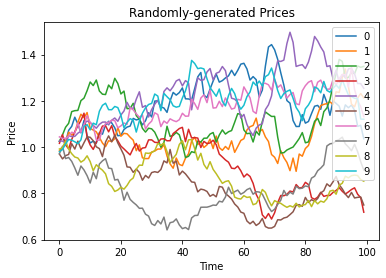

In [767]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

**My own example 112**

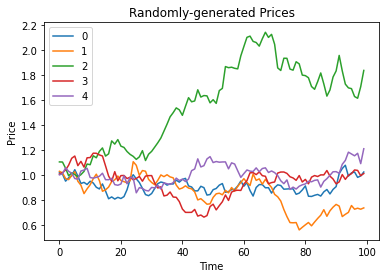

In [768]:
returns = pd.DataFrame(np.random.normal(1.0, 0.04, (100, 5)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [769]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


**My own example 113**

In [770]:
s_s = pd.Series([1, 3, np.nan, 5, 6])
print (s_s)

0    1.0
1    3.0
2    NaN
3    5.0
4    6.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [771]:
print (s.name)

None


This name can be directly modified with no repercussions.

In [772]:
s.name = "Toy Series"
print (s.name)

Toy Series


**My own example 114**

In [773]:
s_s.name = "series"
print(s_s.name)

series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [774]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [775]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


**My own example 115**

In [776]:
my_new_index = pd.date_range("2021-01-01", periods=len(s_s), freq="D")
print (my_new_index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [777]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


**My own example 116**

In [778]:
s_s.index = my_new_index
print (s_s.index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [779]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


**My own example 117**

In [780]:
print ("First element of the series: ", s_s.iloc[0])
print ("Last element of the series: ", s_s.iloc[len(s_s)-1])

First element of the series:  1.0
Last element of the series:  6.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [781]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 118**

In [782]:
s_s.iloc[:4]

2021-01-01    1.0
2021-01-02    3.0
2021-01-03    NaN
2021-01-04    5.0
Freq: D, Name: series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [783]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 119**

In [784]:
start = 1
end = len(s) - 2
step = 1

s.iloc[start:end:step]

2016-01-02    2.0
2016-01-03    NaN
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [785]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 120**

In [786]:
s_s.iloc[::-2]

2021-01-05    6.0
2021-01-03    NaN
2021-01-01    1.0
Freq: -2D, Name: series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [787]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

**My own example 121**

In [788]:
s_s.iloc[-1:-3:-1]

2021-01-05    6.0
2021-01-04    5.0
Freq: -1D, Name: series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [789]:
s.loc['2016-01-01']

1.0

**My own example 122**

In [790]:
s_s.loc['2021-01-01']

1.0

Or even for a range of dates!

In [791]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

**My own example 123**

In [792]:
s_s.loc['2021-01-01':'2021-02-04']

2021-01-01    1.0
2021-01-02    3.0
2021-01-03    NaN
2021-01-04    5.0
2021-01-05    6.0
Freq: D, Name: series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [793]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


**My own example 124**

In [794]:
print (s_s < 5)

2021-01-01     True
2021-01-02     True
2021-01-03    False
2021-01-04    False
2021-01-05    False
Freq: D, Name: series, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [795]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 125**

In [796]:
print (s_s.loc[s_s < 3])

2021-01-01    1.0
Freq: D, Name: series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [797]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


**My own example 126**

In [798]:
print (s_s.loc[(s_s < 4) & (s_s > 0)])

2021-01-01    1.0
2021-01-02    3.0
Freq: D, Name: series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [799]:
symbol = "CMG"
start_date = "2012-1-1"
end_date = "2016-1-1"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
data = yf.download(symbol, start=start_date, end=end_date)
prices = data['Close']

[*********************100%***********************]  1 of 1 completed


**My own example 127**

In [800]:
my_symbol = "AMD"
my_start = "2016-1-1"
my_end = "2021-1-1"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
my_data = yf.download(my_symbol, start= my_start, end=my_end)
my_prices = my_data['Close']

[*********************100%***********************]  1 of 1 completed


We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [801]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Close, dtype: float64

**My own example 128**

In [802]:
print ("\n", type(my_prices))
my_prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2016-01-04    2.77
2016-01-05    2.75
2016-01-06    2.51
2016-01-07    2.28
2016-01-08    2.14
Name: Close, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.


In [803]:
print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

Old name:  Close
New name:  CMG


**My own example 129**

In [804]:
print ('Old name: ', my_prices.name)
my_prices.name = my_symbol
print ('New name: ', my_prices.name)

Old name:  Close
New name:  AMD


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [805]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


**My own example 130**

In [806]:
print (my_prices.index)

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [807]:
#monthly_prices = prices.resample('M') see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
monthly_prices = prices.resample('M', convention='end').asfreq()
monthly_prices.head(10)

Date
2012-01-31    367.290009
2012-02-29    390.220001
2012-03-31           NaN
2012-04-30    414.149994
2012-05-31    413.070007
2012-06-30           NaN
2012-07-31    292.329987
2012-08-31    288.640015
2012-09-30           NaN
2012-10-31    254.529999
Freq: M, Name: CMG, dtype: float64

**My own example 131**

In [808]:
#monthly_prices = prices.resample('M') see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
my_monthly_prices = my_prices.resample('M', convention='end').asfreq()
my_monthly_prices.head(10)

Date
2016-01-31     NaN
2016-02-29    2.14
2016-03-31    2.85
2016-04-30     NaN
2016-05-31    4.57
2016-06-30    5.14
2016-07-31     NaN
2016-08-31    7.40
2016-09-30    6.91
2016-10-31    7.23
Freq: M, Name: AMD, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [809]:
monthly_prices_med = prices.resample('M', convention='end').median()
monthly_prices_med.head(10)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: CMG, dtype: float64

**My own example 132**

In [810]:
my_monthly_prices_med = my_prices.resample('M', convention='end').median()
my_monthly_prices_med.head(10)

Date
2016-01-31    2.140
2016-02-29    1.975
2016-03-31    2.655
2016-04-30    2.800
2016-05-31    3.770
2016-06-30    4.620
2016-07-31    5.195
2016-08-31    6.780
2016-09-30    6.320
2016-10-31    6.840
Freq: M, Name: AMD, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [811]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

#first_of_month_prices = prices.resample('M', how=custom_resampler) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2012-01-31    341.269989
2012-02-29    370.410004
2012-03-31    394.100006
2012-04-30    418.399994
2012-05-31    419.890015
2012-06-30    397.140015
2012-07-31    383.459991
2012-08-31    280.670013
2012-09-30    285.989990
2012-10-31    316.130005
Freq: M, Name: CMG, dtype: float64

**My own example 133**

In [812]:
def my_custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

#first_of_month_prices = prices.resample('M', how=custom_resampler) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
my_first_of_month_prices = my_prices.resample('M').apply(my_custom_resampler)
my_first_of_month_prices.head(10)

Date
2016-01-31    2.77
2016-02-29    2.14
2016-03-31    2.18
2016-04-30    2.83
2016-05-31    3.74
2016-06-30    4.43
2016-07-31    5.07
2016-08-31    6.64
2016-09-30    7.35
2016-10-31    6.95
Freq: M, Name: AMD, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [813]:
#eastern_prices = prices.tz_convert('US/Eastern') see: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_localize.html
eastern_prices = prices.tz_localize(tz='US/Eastern')

eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    341.269989
2012-01-04 00:00:00-05:00    348.750000
2012-01-05 00:00:00-05:00    350.480011
2012-01-06 00:00:00-05:00    348.950012
2012-01-09 00:00:00-05:00    339.739990
2012-01-10 00:00:00-05:00    341.119995
2012-01-11 00:00:00-05:00    347.600006
2012-01-12 00:00:00-05:00    347.619995
2012-01-13 00:00:00-05:00    354.619995
2012-01-17 00:00:00-05:00    353.380005
Name: CMG, dtype: float64

**My own example 134**

In [814]:
#eastern_prices = prices.tz_convert('US/Eastern') see: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_localize.html
my_eastern_prices = my_prices.tz_localize(tz='US/Eastern')

my_eastern_prices.head(10)

Date
2016-01-04 00:00:00-05:00    2.77
2016-01-05 00:00:00-05:00    2.75
2016-01-06 00:00:00-05:00    2.51
2016-01-07 00:00:00-05:00    2.28
2016-01-08 00:00:00-05:00    2.14
2016-01-11 00:00:00-05:00    2.34
2016-01-12 00:00:00-05:00    2.39
2016-01-13 00:00:00-05:00    2.25
2016-01-14 00:00:00-05:00    2.21
2016-01-15 00:00:00-05:00    2.03
Name: AMD, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [815]:
calendar_dates = pd.date_range(start=start, end=end, freq='D')
print (calendar_dates)

DatetimeIndex(['1970-01-01 00:00:00.000000001'], dtype='datetime64[ns]', freq='D')


**My own example 135**

In [816]:
my_calendar_dates = pd.date_range(start=my_start, end=my_end, freq='D')
print(my_calendar_dates)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=1828, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [817]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

1970-01-01 00:00:00.000000001   NaN
Freq: D, Name: CMG, dtype: float64

**My own example 136**

In [818]:
my_calendar_prices = my_prices.reindex(my_calendar_dates, method='ffill')
my_calendar_prices.head(15)

2016-01-01     NaN
2016-01-02     NaN
2016-01-03     NaN
2016-01-04    2.77
2016-01-05    2.75
2016-01-06    2.51
2016-01-07    2.28
2016-01-08    2.14
2016-01-09    2.14
2016-01-10    2.14
2016-01-11    2.34
2016-01-12    2.39
2016-01-13    2.25
2016-01-14    2.21
2016-01-15    2.03
Freq: D, Name: AMD, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [819]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

1970-01-01 00:00:00.000000001   NaN
Freq: D, Name: CMG, dtype: float64

**My own example 137**

In [820]:
my_meanfilled_prices = my_calendar_prices.fillna(my_calendar_prices.mean())
my_meanfilled_prices.head(10)

2016-01-01    26.100844
2016-01-02    26.100844
2016-01-03    26.100844
2016-01-04     2.770000
2016-01-05     2.750000
2016-01-06     2.510000
2016-01-07     2.280000
2016-01-08     2.140000
2016-01-09     2.140000
2016-01-10     2.140000
Freq: D, Name: AMD, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [821]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

1970-01-01 00:00:00.000000001   NaN
Freq: D, Name: CMG, dtype: float64

**My own example 138**

In [822]:
my_bfilled_prices = my_calendar_prices.fillna(method='bfill')
my_bfilled_prices.head(10)

2016-01-01    2.77
2016-01-02    2.77
2016-01-03    2.77
2016-01-04    2.77
2016-01-05    2.75
2016-01-06    2.51
2016-01-07    2.28
2016-01-08    2.14
2016-01-09    2.14
2016-01-10    2.14
Freq: D, Name: AMD, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [823]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

Series([], Freq: D, Name: CMG, dtype: float64)

**My own example 139**

In [824]:
my_dropped_prices = my_calendar_prices.dropna()
my_dropped_prices.head(10)

2016-01-04    2.77
2016-01-05    2.75
2016-01-06    2.51
2016-01-07    2.28
2016-01-08    2.14
2016-01-09    2.14
2016-01-10    2.14
2016-01-11    2.34
2016-01-12    2.39
2016-01-13    2.25
Freq: D, Name: AMD, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

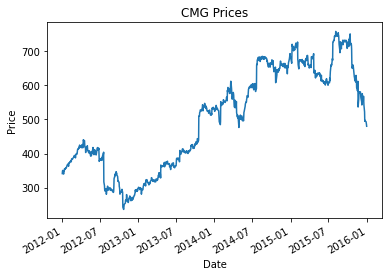

In [825]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

**My own example 140**

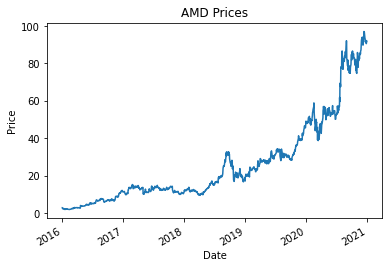

In [826]:
my_prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(my_symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [827]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  501.63665038880487
Standard deviation:  146.68873796090145


**My own example 141**

In [828]:
print ("Mean: ", my_prices.mean())
print ("Standard deviation: ", my_prices.std())

Mean:  26.137688631572072
Standard deviation:  23.071376325230762


In [829]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: CMG, dtype: float64


**My own example 142**

In [830]:
print("Summary Statistics")
print(my_prices.describe())

Summary Statistics
count    1259.000000
mean       26.137689
std        23.071376
min         1.800000
25%        10.940000
50%        16.270000
75%        32.924999
max        97.120003
Name: AMD, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [831]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    672.539978
2012-01-04    687.500000
2012-01-05    690.960022
2012-01-06    687.900024
2012-01-09    669.479980
Name: CMG, dtype: float64

**My own examples 143**

In [832]:
my_modified_prices = my_prices * 2 - 5
my_modified_prices.head(5)

Date
2016-01-04    0.54
2016-01-05    0.50
2016-01-06    0.02
2016-01-07   -0.44
2016-01-08   -0.72
Name: AMD, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [833]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    390.321458
2012-01-04    424.058061
2012-01-05    378.634467
2012-01-06    349.205945
2012-01-09    334.574319
dtype: float64

**My own examples 144**

In [834]:
my_noisy_prices = my_prices + 5 * pd.Series(np.random.normal(0, 5, len(my_prices)), index=my_prices.index) + 10
my_noisy_prices.head(5)

Date
2016-01-04    -6.161704
2016-01-05    27.327558
2016-01-06    39.205178
2016-01-07    35.691739
2016-01-08    23.200920
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [835]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

**My own example 145**

In [836]:
my_empty_series = my_prices + pd.Series(np.random.normal(0, 1, len(my_prices)))
my_empty_series.head(5)

2016-01-04 00:00:00   NaN
2016-01-05 00:00:00   NaN
2016-01-06 00:00:00   NaN
2016-01-07 00:00:00   NaN
2016-01-08 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [837]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

**My own example 146**

In [838]:
my_add_returns = my_prices.diff()[1:]
my_mult_returns = my_prices.pct_change()[1:]

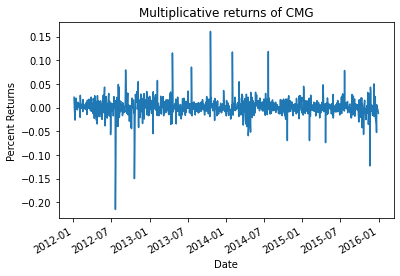

In [839]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

**My own example 147**

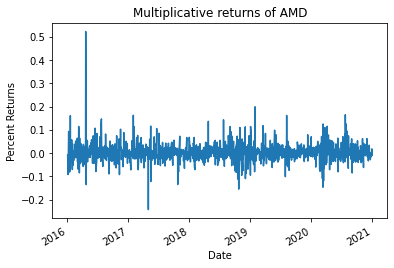

In [840]:
plt.title("Multiplicative returns of " + my_symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
my_mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [841]:
#rolling_mean = pd.rolling_mean(prices, 30) see: https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
rolling_mean = pd.Series(prices).rolling(window=30).mean()
rolling_mean.name = "30-day rolling mean"

**My own example 148**

In [842]:
#rolling_mean = pd.rolling_mean(prices, 30) see: https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
my_rolling_mean = pd.Series(my_prices).rolling(window=30).mean()
my_rolling_mean.name = "30-day rolling mean"

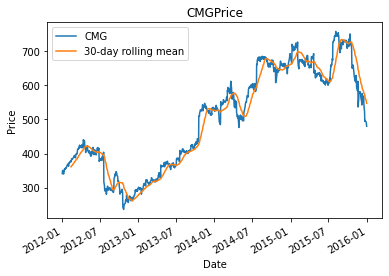

In [843]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

**My own example 149**

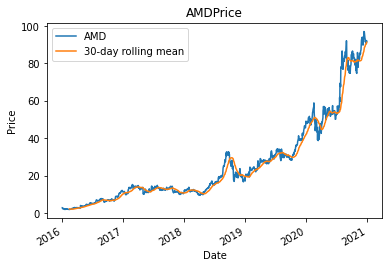

In [844]:
my_prices.plot()
my_rolling_mean.plot()
plt.title(my_symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [845]:
#rolling_std = pd.rolling_std(prices, 30) https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
rolling_std = pd.Series(prices).rolling(window=30).std()
rolling_std.name = "30-day rolling volatility"

**My own example 150**

In [846]:
#rolling_std = pd.rolling_std(prices, 30) https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
my_rolling_std = pd.Series(my_prices).rolling(window=30).std()
my_rolling_std.name = "30-day rolling volatility"

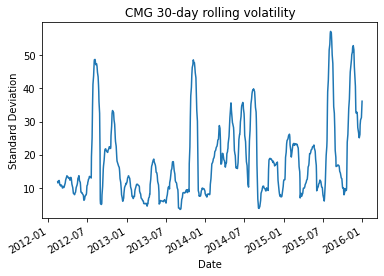

In [847]:
rolling_std.plot()
plt.title(symbol +' '+ rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

**My own example 151**

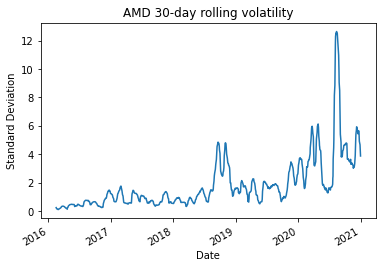

In [848]:
my_rolling_std.plot()
plt.title(my_symbol +' '+ my_rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [849]:
print(np.median(mult_returns))

0.00023590204910717283


**My own example 152**

In [850]:
print(np.median(my_mult_returns))

0.0017735590600650442


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [851]:
print(mult_returns.median())

0.00023590204910717283


**My own example 153**

In [852]:
print(my_mult_returns.median())

0.0017735590600650442


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [853]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.13976357, -0.96197701, -1.64975627, -1.51783464, -1.05992108])}


**My own example 154**

In [854]:
my_dict_data = {
    'a' : [10, 20, 30, 40, 50],
    'b' : ['LL', 'KK', 'JJ', 'MM', 'ZZ'],
    'c' : np.random.normal(0, 1, 5)
}
print (my_dict_data)

{'a': [10, 20, 30, 40, 50], 'b': ['LL', 'KK', 'JJ', 'MM', 'ZZ'], 'c': array([-1.1897823 ,  0.29110826, -1.53668514,  1.67164099,  0.29798766])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [855]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L -0.139764
2016-01-02  2  K -0.961977
2016-01-03  3  J -1.649756
2016-01-04  4  M -1.517835
2016-01-05  5  Z -1.059921


**My own example 155**

In [856]:
my_frame_data = pd.DataFrame(my_dict_data, index=pd.date_range('2016-01-01', periods=5))
print (my_frame_data)

             a   b         c
2016-01-01  10  LL -1.189782
2016-01-02  20  KK  0.291108
2016-01-03  30  JJ -1.536685
2016-01-04  40  MM  1.671641
2016-01-05  50  ZZ  0.297988


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [857]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


**My own example 156**

In [858]:
my_s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
my_s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
my_numbers = pd.concat([my_s_1, my_s_2], axis=1)
print (my_numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [859]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


**My own example 157**

In [860]:
print (my_numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [861]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


**My own example 158**

In [862]:
my_numbers.columns = ['mevens', 'modds']
print (my_numbers)

   mevens  modds
0       2      1
1       4      3
2       6      5
3       8      7
4      10      9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [863]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


**My own example 159**

In [864]:
print (my_numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [865]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


**My own example 160**

In [866]:
my_numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (my_numbers)

            mevens  modds
2016-01-01       2      1
2016-01-02       4      3
2016-01-03       6      5
2016-01-04       8      7
2016-01-05      10      9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [867]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

**My own example 161**

In [868]:
my_numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [869]:
type(numbers.values)

numpy.ndarray

**My own example 162**

In [870]:
type(my_numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [871]:
symbol = ["CMG", "MCD", "SHAK", "AMD"]
start_date = "2012-01-01"
end_date = "2016-01-01"

data = yf.download(symbol, start=start_date, end=end_date) 
prices = data['Close']
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
"""
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol
"""

[*********************100%***********************]  4 of 4 completed


'\nif isinstance(symbol, list):\n    prices.columns = map(lambda x: x.symbol, prices.columns)\nelse:\n    prices.name = symbol\n'

**My own example 163**

In [872]:
my_symbol = ["AMD", "MCD", "SHAK", "AAPL"]
my_start = "2016-01-01"
my_end = "2021-01-01"

my_data = yf.download(my_symbol, start=my_start, end=my_end) 
my_prices = my_data['Close']

[*********************100%***********************]  4 of 4 completed


Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [873]:
prices.CMG.head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

**My own example 164**

In [874]:
my_prices.AAPL.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: AAPL, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [875]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

**My own example 165**

In [876]:
my_prices.loc[:, 'AAPL'].head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: AAPL, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [877]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**My own example 166**

In [878]:
print(type(my_prices.AAPL))
print(type(my_prices.loc[:, 'AAPL']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [879]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
Date,,
2012-01-03,341.269989,98.839996
2012-01-04,348.750000,99.389999
2012-01-05,350.480011,99.830002
2012-01-06,348.950012,100.599998
2012-01-09,339.739990,99.639999


**My own example 167**

In [880]:
my_prices.loc[:, ['AAPL', 'AMD']].head()

,AAPL,AMD
Date,,
2016-01-04,26.337500,2.77
2016-01-05,25.677500,2.75
2016-01-06,25.174999,2.51
2016-01-07,24.112499,2.28
2016-01-08,24.240000,2.14


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [881]:
prices.loc['2015-12-15':'2015-12-22']

,AMD,CMG,MCD,SHAK
Date,,,,
2015-12-15,2.36,554.859985,116.930000,41.580002
2015-12-16,2.54,567.830017,117.839996,40.169998
2015-12-17,2.56,554.890015,117.500000,38.540001
2015-12-18,2.45,541.080017,116.660004,39.750000
2015-12-21,2.53,522.010010,117.690002,38.189999
2015-12-22,2.77,494.609985,117.720001,39.750000


**My own example 168**

In [882]:
my_prices.loc['2016-12-15':'2016-12-22']

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-12-15,28.955000,10.86,122.360001,38.020000
2016-12-16,28.992500,10.66,123.239998,38.349998
2016-12-19,29.160000,10.95,122.989998,38.160000
2016-12-20,29.237499,11.51,123.330002,37.980000
2016-12-21,29.264999,11.47,123.180000,37.270000
2016-12-22,29.072500,11.60,123.720001,36.880001


This plays nicely with lists of columns, too.

In [883]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
Date,,
2015-12-15,554.859985,116.930000
2015-12-16,567.830017,117.839996
2015-12-17,554.890015,117.500000
2015-12-18,541.080017,116.660004
2015-12-21,522.010010,117.690002
2015-12-22,494.609985,117.720001


**My own example 169**

In [884]:
my_prices.loc['2016-12-15':'2016-12-22', ['AAPL', 'MCD']]

,AAPL,MCD
Date,,
2016-12-15,28.955000,122.360001
2016-12-16,28.992500,123.239998
2016-12-19,29.160000,122.989998
2016-12-20,29.237499,123.330002
2016-12-21,29.264999,123.180000
2016-12-22,29.072500,123.720001


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [885]:
prices.iloc[0:2, 1]

Date
2012-01-03    341.269989
2012-01-04    348.750000
Name: CMG, dtype: float64

**My own example 170**

In [886]:
my_prices.iloc[0:5, 2]

Date
2016-01-04    117.580002
2016-01-05    119.199997
2016-01-06    118.400002
2016-01-07    115.660004
2016-01-08    115.480003
Name: MCD, dtype: float64

In [887]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [1, 2]].head(20)

,CMG,MCD
Date,,
2012-01-04,348.750000,99.389999
2012-01-06,348.950012,100.599998
2012-01-10,341.119995,99.699997
2012-01-12,347.619995,100.570000
2012-01-17,353.380005,100.550003
2012-01-19,358.089996,101.260002
2012-01-23,360.459991,100.949997
2012-01-25,363.140015,99.230003
2012-01-27,366.760010,98.690002


**My own example 171**

In [888]:
my_prices.iloc[[1, 3, 5] + list(range(7, 200, 4)), [0, 3]].head(5)

,AAPL,SHAK
Date,,
2016-01-05,25.677500,39.009998
2016-01-07,24.112499,36.200001
2016-01-11,24.632500,34.209999
2016-01-13,24.347500,31.920000
2016-01-20,24.197500,33.750000


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [889]:
prices.loc[prices.MCD > prices.AMD].head()

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,NaN
2012-01-04,5.46,348.750000,99.389999,NaN
2012-01-05,5.46,350.480011,99.830002,NaN
2012-01-06,5.43,348.950012,100.599998,NaN
2012-01-09,5.59,339.739990,99.639999,NaN


**My own example 172**

In [890]:
my_prices.loc[my_prices.AAPL > my_prices.AMD].head()

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-01-04,26.337500,2.77,117.580002,38.549999
2016-01-05,25.677500,2.75,119.199997,39.009998
2016-01-06,25.174999,2.51,118.400002,38.330002
2016-01-07,24.112499,2.28,115.660004,36.200001
2016-01-08,24.240000,2.14,115.480003,34.900002


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [891]:
prices.loc[(prices.MCD > prices.AMD) & ~prices.SHAK.isnull()].head()

,AMD,CMG,MCD,SHAK
Date,,,,
2015-01-30,2.57,709.840027,92.440002,45.900002
2015-02-02,2.67,712.549988,92.510002,43.990002
2015-02-03,2.76,726.630005,93.919998,44.980000
2015-02-04,2.85,676.000000,94.050003,41.320000
2015-02-05,3.31,670.909973,94.339996,42.639999


**My own example 173**

In [892]:
my_prices.loc[(my_prices.AAPL > my_prices.AMD) & ~my_prices.SHAK.isnull()].head()

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-01-04,26.337500,2.77,117.580002,38.549999
2016-01-05,25.677500,2.75,119.199997,39.009998
2016-01-06,25.174999,2.51,118.400002,38.330002
2016-01-07,24.112499,2.28,115.660004,36.200001
2016-01-08,24.240000,2.14,115.480003,34.900002


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [893]:
#s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price') reason: not working
data = yf.download("TSLA", start=start_date, end=end_date) 
s_1 = data['Close']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,AMD,CMG,MCD,SHAK,TSLA
Date,,,,,
2012-01-03,5.48,341.269989,98.839996,NaN,5.616
2012-01-04,5.46,348.750000,99.389999,NaN,5.542
2012-01-05,5.46,350.480011,99.830002,NaN,5.424
2012-01-06,5.43,348.950012,100.599998,NaN,5.382
2012-01-09,5.59,339.739990,99.639999,NaN,5.450


**My own example 174**

In [894]:
#s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price') reason: not working
my_data = yf.download("UPS", start=my_start, end=my_end) 
my_s_1 = my_data['Close']
my_prices.loc[:, 'UPS'] = my_s_1
my_prices.head(5)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,AAPL,AMD,MCD,SHAK,UPS
Date,,,,,
2016-01-04,26.337500,2.77,117.580002,38.549999,94.839996
2016-01-05,25.677500,2.75,119.199997,39.009998,95.779999
2016-01-06,25.174999,2.51,118.400002,38.330002,94.419998
2016-01-07,24.112499,2.28,115.660004,36.200001,92.599998
2016-01-08,24.240000,2.14,115.480003,34.900002,91.389999


It is also just as easy to remove a column.

In [895]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,NaN
2012-01-04,5.46,348.750000,99.389999,NaN
2012-01-05,5.46,350.480011,99.830002,NaN
2012-01-06,5.43,348.950012,100.599998,NaN
2012-01-09,5.59,339.739990,99.639999,NaN


**My own example 175**

In [896]:
my_prices = my_prices.drop('UPS', axis=1)
my_prices.head(5)

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-01-04,26.337500,2.77,117.580002,38.549999
2016-01-05,25.677500,2.75,119.199997,39.009998
2016-01-06,25.174999,2.51,118.400002,38.330002
2016-01-07,24.112499,2.28,115.660004,36.200001
2016-01-08,24.240000,2.14,115.480003,34.900002


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [898]:
#df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
#df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
data_1 = yf.download(['SPY', 'VXX'], start=start_date, end=end_date) 
data_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start_date, end=end_date) 
df_1 = data_1['Close']
df_2 = data_2['Close']
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- VXX: Data doesn't exist for startDate = 1325376000, endDate = 1451606400
[*********************100%***********************]  3 of 3 completed


,SPY,VXX,AAPL,GOOG,MSFT
Date,,,,,
2012-01-03 00:00:00,127.500000,NaN,14.686786,331.462585,26.770000
2012-01-04 00:00:00,127.699997,NaN,14.765714,332.892242,27.400000
2012-01-05 00:00:00,128.039993,NaN,14.929643,328.274536,27.680000
2012-01-06 00:00:00,127.709999,NaN,15.085714,323.796326,28.110001
2012-01-09 00:00:00,128.020004,NaN,15.061786,310.067780,27.740000


**My own example 176**

In [899]:

my_data_1 = yf.download(['SPY', 'AMD'], start=my_start, end=my_end) 
my_data_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=my_start, end=my_end) 
my_df_1 = my_data_1['Close']
my_df_2 = my_data_2['Close']
my_df_3 = pd.concat([my_df_1, my_df_2], axis=1)
my_df_3.head()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


,AMD,SPY,AAPL,GOOG,MSFT
Date,,,,,
2016-01-04,2.77,201.020004,26.337500,741.840027,54.799999
2016-01-05,2.75,201.360001,25.677500,742.580017,55.049999
2016-01-06,2.51,198.820007,25.174999,743.619995,54.049999
2016-01-07,2.28,194.050003,24.112499,726.390015,52.169998
2016-01-08,2.14,191.919998,24.240000,714.469971,52.330002


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [900]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,0.0
2012-01-04,5.46,348.750000,99.389999,0.0
2012-01-05,5.46,350.480011,99.830002,0.0
2012-01-06,5.43,348.950012,100.599998,0.0
2012-01-09,5.59,339.739990,99.639999,0.0


**My own example 177**

In [901]:
my_filled0_prices = prices.fillna(0)
my_filled0_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,0.0
2012-01-04,5.46,348.750000,99.389999,0.0
2012-01-05,5.46,350.480011,99.830002,0.0
2012-01-06,5.43,348.950012,100.599998,0.0
2012-01-09,5.59,339.739990,99.639999,0.0


In [902]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,45.900002
2012-01-04,5.46,348.750000,99.389999,45.900002
2012-01-05,5.46,350.480011,99.830002,45.900002
2012-01-06,5.43,348.950012,100.599998,45.900002
2012-01-09,5.59,339.739990,99.639999,45.900002


**My own example 178**

In [903]:
my_bfilled_prices = prices.fillna(method='bfill')
my_bfilled_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,5.48,341.269989,98.839996,45.900002
2012-01-04,5.46,348.750000,99.389999,45.900002
2012-01-05,5.46,350.480011,99.830002,45.900002
2012-01-06,5.43,348.950012,100.599998,45.900002
2012-01-09,5.59,339.739990,99.639999,45.900002


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [904]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2015-01-30,2.57,709.840027,92.440002,45.900002
2015-02-02,2.67,712.549988,92.510002,43.990002
2015-02-03,2.76,726.630005,93.919998,44.980000
2015-02-04,2.85,676.000000,94.050003,41.320000
2015-02-05,3.31,670.909973,94.339996,42.639999


**My own examples 179**

In [905]:
my_dropped_prices = prices.dropna()
my_dropped_prices.head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2015-01-30,2.57,709.840027,92.440002,45.900002
2015-02-02,2.67,712.549988,92.510002,43.990002
2015-02-03,2.76,726.630005,93.919998,44.980000
2015-02-04,2.85,676.000000,94.050003,41.320000
2015-02-05,3.31,670.909973,94.339996,42.639999


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

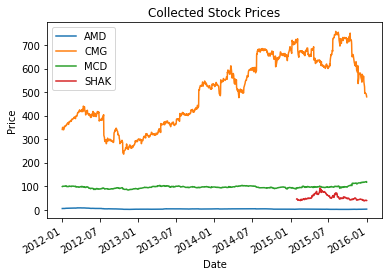

In [906]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

**My own example 180**

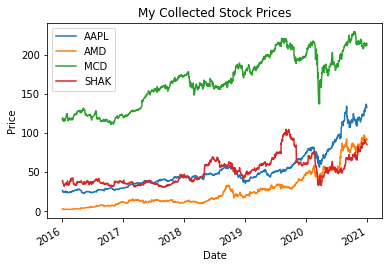

In [907]:
my_prices.plot()
plt.title("My Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [908]:
prices.mean(axis=0)

AMD       3.607962
CMG     501.636650
MCD      96.621600
SHAK     53.575708
dtype: float64

**My own examples 181**

In [909]:
my_prices.mean(axis=1)

Date
2016-01-04     46.309375
2016-01-05     46.659374
2016-01-06     46.103751
2016-01-07     44.563126
2016-01-08     44.190001
                 ...    
2020-12-24    130.742500
2020-12-28    132.110001
2020-12-29    131.032501
2020-12-30    130.607500
2020-12-31    130.940001
Length: 1259, dtype: float64

As well as the standard deviation:

In [910]:
prices.std(axis=0)

AMD       1.485888
CMG     146.688738
MCD       5.714226
SHAK     11.968587
dtype: float64

**My own example 182**

In [911]:
my_prices.std(axis=1)

Date
2016-01-04    49.780395
2016-01-05    50.625840
2016-01-06    50.416951
2016-01-07    49.432778
2016-01-08    49.446178
                ...    
2020-12-24    57.344932
2020-12-28    59.119783
2020-12-29    58.746197
2020-12-30    58.092050
2020-12-31    59.633467
Length: 1259, dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [912]:
prices.describe()

,AMD,CMG,MCD,SHAK
count,1006.000000,1006.000000,1006.000000,233.000000
mean,3.607962,501.636650,96.621600,53.575708
std,1.485888,146.688738,5.714226,11.968587
min,1.620000,236.240005,84.050003,38.189999
25%,2.540000,371.555000,93.672499,44.119999
50%,3.450000,521.270020,96.290001,49.270000
75%,4.060000,646.834991,99.137499,61.669998
max,8.250000,757.770020,120.070000,92.860001


**My own example 183**

In [913]:
my_prices.describe()

,AAPL,AMD,MCD,SHAK
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,51.741994,26.137689,166.866752,50.801597
std,26.002123,23.071376,33.312021,17.025446
min,22.584999,1.800000,110.570000,30.600000
25%,35.453751,10.940000,130.134995,36.469999
50%,43.970001,16.270000,165.759995,46.830002
75%,56.789999,32.924999,194.439995,60.740000
max,136.690002,97.120003,229.639999,104.610001


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [914]:
(2 * prices - 50).head(5)

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-03,-39.04,632.539978,147.679993,NaN
2012-01-04,-39.08,647.500000,148.779999,NaN
2012-01-05,-39.08,650.960022,149.660004,NaN
2012-01-06,-39.14,647.900024,151.199997,NaN
2012-01-09,-38.82,629.479980,149.279999,NaN


**My own example 184**

In [915]:
(2 * my_prices - 5).head(5)

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-01-04,47.674999,0.54,230.160004,72.099998
2016-01-05,46.355000,0.50,233.399994,73.019997
2016-01-06,45.349998,0.02,231.800003,71.660004
2016-01-07,43.224998,-0.44,226.320007,67.400002
2016-01-08,43.480000,-0.72,225.960007,64.800003


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [916]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,AMD,CMG,MCD,SHAK
Date,,,,
2012-01-04,-0.003650,0.021918,0.005565,NaN
2012-01-05,0.000000,0.004961,0.004427,NaN
2012-01-06,-0.005495,-0.004365,0.007713,NaN
2012-01-09,0.029466,-0.026394,-0.009543,NaN
2012-01-10,0.021467,0.004062,0.000602,NaN


**My own example 185**

In [917]:
my_mult_returns = my_prices.pct_change()[1:]
my_mult_returns.head()

,AAPL,AMD,MCD,SHAK
Date,,,,
2016-01-05,-0.025059,-0.007220,0.013778,0.011933
2016-01-06,-0.019570,-0.087273,-0.006711,-0.017431
2016-01-07,-0.042205,-0.091633,-0.023142,-0.055570
2016-01-08,0.005288,-0.061403,-0.001556,-0.035912
2016-01-11,0.016192,0.093458,0.010478,-0.019771


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

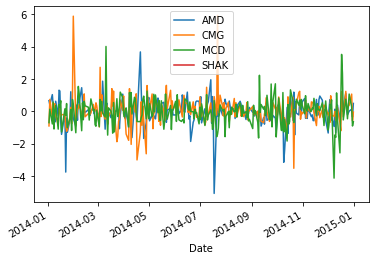

In [918]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

**My own example 186**

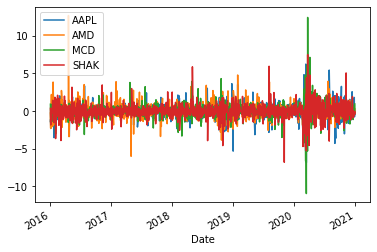

In [919]:
my_norm_returns = (my_mult_returns - my_mult_returns.mean(axis=0))/my_mult_returns.std(axis=0)
my_norm_returns.loc['2013-01-01':'2022-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [951]:
#rolling_mean = pd.rolling_mean(prices, 30) see: https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
rolling_mean = pd.DataFrame(prices).rolling(window=30).mean()

**My own example 187**

In [953]:
#rolling_mean = pd.rolling_mean(prices, 30) see: https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
my_rolling_mean = pd.DataFrame(my_prices).rolling(window=30).mean()

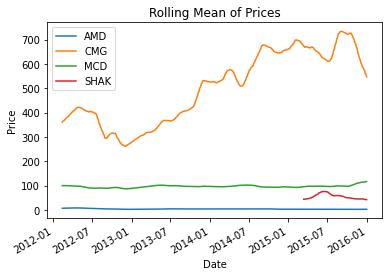

In [952]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

**My own example 188**

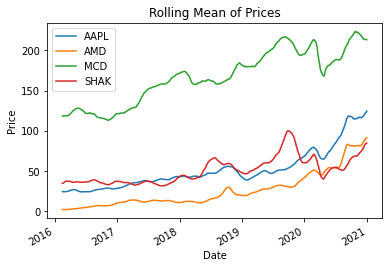

In [954]:
my_rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

#Data Types and Data Structures

# Introduction

This tutorial provides a basic introduction to the Python programming language. If you are new to Python, you should run the code snippets while reading this tutorial. If you are an advanced Python user, please feel free to skip this chapter.

# Basic Variable Types
The basic types of variables in Python are: strings, integers, floating point numbers and booleans.

Strings in python are identified as a contiguous set of characters represented in either single quotes (' ') or double quotes (" ").


In [955]:
my_string1 = 'Welcome to'
my_string2 = "QuantConnect"
print(my_string1 + ' ' + my_string2)

Welcome to QuantConnect


**My own example 189**

In [956]:
string1 = 'Welcome to'
string2 = "UNAL"
print(string1 + ' ' + string2)

Welcome to UNAL


An integer is a round number with no values after the decimal point.

In [957]:
my_int = 10
print(my_int)
print(type(my_int))

10
<class 'int'>


**My own example 190**

In [958]:
my_own_int = 15
print(my_own_int)
print(type(my_own_int))

15
<class 'int'>


The built-in function int() can convert a string into an integer.

In [959]:
my_string = "100"
print(type(my_string))
my_int = int(my_string)
print(type(my_int))

<class 'str'>
<class 'int'>


**My own example 191**

In [960]:
my_own_string = "15"
print(type(my_own_string))
my_own_int = int(my_own_string)
print(type(my_own_int))

<class 'str'>
<class 'int'>


A floating point number, or a float, is a real number in mathematics. In Python we need to include a value after a decimal point to define it as a float

In [961]:
my_string = "100"
my_float = float(my_string)
print(type(my_float))

<class 'float'>


**My own example 192**

In [962]:
my_own_string = "15684"
my_own_float = float(my_own_string)
print(type(my_own_float))

<class 'float'>


As you can see above, if we don't include a decimal value, the variable would be defined as an integer. The built-in function float() can convert a string or an integer into a float.

In [963]:
my_bool = False
print(my_bool)
print(type(my_bool))

False
<class 'bool'>


**My own example 193**

In [964]:
my_own_bool = True
print(my_own_bool)
print(type(my_own_bool))

True
<class 'bool'>


A boolean, or bool, is a binary variable. Its value can only be True or False. It is useful when we do some logic operations, which would be covered in our next chapter.

In [965]:
print("Addition ", 1+1)
print("Subtraction ", 5-2)
print("Multiplication ", 2*3)
print("Division ", 10/2)
print('exponent', 2**3)

Addition  2
Subtraction  3
Multiplication  6
Division  5.0
exponent 8


**My own example 194**

In [966]:
print("Addition ", 1+2)
print("Subtraction ", 556-2256)
print("Multiplication ", 2546*3)
print("Division ", 1564/2)
print('exponent', 2**10)

Addition  3
Subtraction  -1700
Multiplication  7638
Division  782.0
exponent 1024


# Basic Math Operations

The basic math operators in python are demonstrated below:

In [967]:
print(1/3)
print(1.0/3)

0.3333333333333333
0.3333333333333333


**My own example 195**

In [968]:
print(11/3)
print(11.0/3)

3.6666666666666665
3.6666666666666665


# Data Collections

## List
A list is an ordered collection of values. A list is mutable, which means you can change a list's value without changing the list itself. Creating a list is simply putting different comma-separated values between square brackets.

In [ ]:
my_list = ['Quant', 'Connect', 1,2,3]
print(my_list)

**My own example 196**

In [969]:
my_own_list = ['Hola', 'Mundo', 1,2,3]
print(my_own_list)

['Hola', 'Mundo', 1, 2, 3]


The values in a list are called "elements". We can access list elements by indexing. Python index starts from 0. So if you have a list of length n, the index of the first element will be 0, and that of the last element will be n − 1. By the way, the length of a list can be obtained by the built-in function len().

In [970]:
my_list = ['Quant', 'Connect', 1,2,3]
print(len(my_list))
print(my_list[0])
print(my_list[len(my_list) -1])

5
Quant
3
